# **Mount Drive and Load Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/440_project_files/train.csv")
test = pd.read_csv("/content/drive/MyDrive/440_project_files/test.csv")
# quick
print(len(train), 'train rows')
print(len(test), 'test rows')


279999 train rows
59999 test rows


In [ ]:
train.head(10)

,QA Text,Class
0,Question Title:\nHave you liked a person who i...,Family & Relationships
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics
2,Question Title:\nhelp to loose weight?\nQuest...,Health
3,Question Title:\nDid you know that the KKK ado...,Business & Finance
4,Question Title:\nhow can i find an old friend ...,Family & Relationships
5,Question Title:\nbest low start up cost busine...,Business & Finance
6,Question Title:\nWhat makes you the happiest ...,Family & Relationships
7,Question Title:\nHow good is Comcast HDTV?\nQu...,Entertainment & Music
8,Question Title:\nHow come im so dumb with ever...,Family & Relationships
9,Question Title:\ni love foto woman alder me?\n...,Family & Relationships


In [ ]:
test.head(10)

,QA Text,Class
0,Question Title:\nWhy does Zebras have stripes?...,Science & Mathematics
1,Question Title:\nWhat did the itsy bitsy sipde...,Education & Reference
2,Question Title:\nWhat is the difference betwee...,Education & Reference
3,Question Title:\nWhy do women get PMS?\nQuesti...,Health
4,Question Title:\nIf your co-worker is guilty o...,Health
5,Question Title:\nwhat is the best podcast to s...,Computers & Internet
6,Question Title:\nWhat are the risks of alterna...,Health
7,Question Title:\nWhat sea creature sleeps with...,Education & Reference
8,Question Title:\nWhat was the first Disney ani...,Entertainment & Music
9,Question Title:\nDo animals have a sense of hu...,Science & Mathematics


# **EDA**

In [ ]:
# Check for missing values in train and test data
print("Missing values in train data:")
print(train.isnull().sum())

print("\nMissing values in test data:")
print(test.isnull().sum())

# Check the distribution of classes in the training data
print("\nClass distribution in train data:")
print(train['Class'].value_counts())

Missing values in train data:
QA Text    0
Class      0
dtype: int64

Missing values in test data:
QA Text    0
Class      0
dtype: int64

Class distribution in train data:
Class
Society & Culture         28210
Sports                    28148
Politics & Government     28142
Family & Relationships    28133
Health                    28047
Computers & Internet      27966
Entertainment & Music     27962
Science & Mathematics     27915
Education & Reference     27751
Business & Finance        27725
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Set style for plots
plt.style.use('ggplot')
sns.set_palette("husl")

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (279999, 2)
Test shape: (59999, 2)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def parse_qa_text(text):
    """
    Parse the QA Text field into title, content, and answer components
    """
    # Initialize with empty strings
    title, content, answer = "", "", ""

    # Extract title
    title_match = re.search(r'Question Title:\s*(.*?)(?=Question Content:|Best Answer:|$)', text, re.DOTALL)
    if title_match:
        title = title_match.group(1).strip()

    # Extract content
    content_match = re.search(r'Question Content:\s*(.*?)(?=Best Answer:|$)', text, re.DOTALL)
    if content_match:
        content = content_match.group(1).strip()

    # Extract answer
    answer_match = re.search(r'Best Answer:\s*(.*)', text, re.DOTALL)
    if answer_match:
        answer = answer_match.group(1).strip()

    return title, content, answer

# Apply parsing to both train and test
for df in [train, test]:
    parsed = df['QA Text'].apply(lambda x: pd.Series(parse_qa_text(x)))
    df['Title'], df['Content'], df['Answer'] = parsed[0], parsed[1], parsed[2]

# Display the parsed structure
print("Sample parsed data from train:")
print(train[['Title', 'Content', 'Answer', 'Class']].head(3))

Sample parsed data from train:
                                               Title Content  \
0  Have you liked a person who is bi-sexual and c...           
1                                what is simulation?           
2                             help to  loose weight?           

                                              Answer                   Class  
0  no but I'm bi there sexual orientation probabl...  Family & Relationships  
1  means that simulate the phenomena( to visualiz...   Science & Mathematics  
2  burn more calories then you take in. its the o...                  Health  


In [ ]:
# Function to calculate text statistics
def text_stats(df, dataset_name):
    print(f"\n=== {dataset_name.upper()} DATASET TEXT STATISTICS ===")

    # Character and word counts
    for col in ['Title', 'Content', 'Answer']:
        df[f'{col}_char_count'] = df[col].apply(lambda x: len(str(x)))
        df[f'{col}_word_count'] = df[col].apply(lambda x: len(str(x).split()))

    # Missing values analysis
    missing_data = pd.DataFrame({
        'Missing Values': df[['Title', 'Content', 'Answer']].isnull().sum(),
        'Empty Strings': [
            (df['Title'] == '').sum(),
            (df['Content'] == '').sum(),
            (df['Answer'] == '').sum()
        ]
    })
    print("Missing/Empty Values:")
    print(missing_data)

    # Text length statistics
    text_stats_df = pd.DataFrame({
        'Title': [df['Title_char_count'].mean(), df['Title_word_count'].mean()],
        'Content': [df['Content_char_count'].mean(), df['Content_word_count'].mean()],
        'Answer': [df['Answer_char_count'].mean(), df['Answer_word_count'].mean()]
    }, index=['Avg Chars', 'Avg Words'])

    print("\nAverage Text Lengths:")
    print(text_stats_df)

    return df

# Calculate statistics for both datasets
train = text_stats(train, 'train')
test = text_stats(test, 'test')


=== TRAIN DATASET TEXT STATISTICS ===
Missing/Empty Values:
         Missing Values  Empty Strings
Title                 0              0
Content               0         126057
Answer                0           4885

Average Text Lengths:
               Title     Content      Answer
Avg Chars  57.159829  117.145136  345.378369
Avg Words  10.727231   21.754974   59.243304

=== TEST DATASET TEXT STATISTICS ===
Missing/Empty Values:
         Missing Values  Empty Strings
Title                 0              0
Content               0          27106
Answer                0           1034

Average Text Lengths:
               Title     Content      Answer
Avg Chars  57.006733  116.579210  346.358723
Avg Words  10.701245   21.659394   59.370840


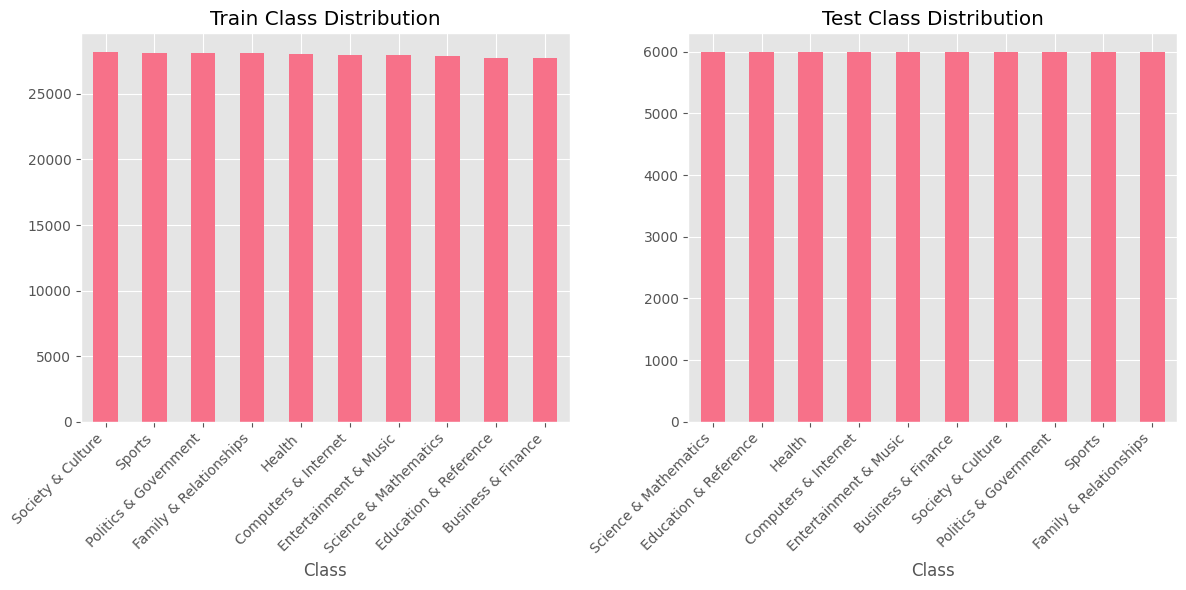

Class distribution comparison:
Train: Class
Society & Culture         0.100750
Sports                    0.100529
Politics & Government     0.100508
Family & Relationships    0.100475
Health                    0.100168
Computers & Internet      0.099879
Entertainment & Music     0.099865
Science & Mathematics     0.099697
Education & Reference     0.099111
Business & Finance        0.099018
Name: proportion, dtype: float64
Test: Class
Science & Mathematics     0.100002
Education & Reference     0.100002
Health                    0.100002
Computers & Internet      0.100002
Entertainment & Music     0.100002
Business & Finance        0.100002
Society & Culture         0.100002
Politics & Government     0.100002
Sports                    0.100002
Family & Relationships    0.099985
Name: proportion, dtype: float64


In [ ]:
# Class distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train['Class'].value_counts().plot(kind='bar')
plt.title('Train Class Distribution')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
test['Class'].value_counts().plot(kind='bar')
plt.title('Test Class Distribution')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Check if class distributions are similar
print("Class distribution comparison:")
print("Train:", train['Class'].value_counts(normalize=True))
print("Test:", test['Class'].value_counts(normalize=True))

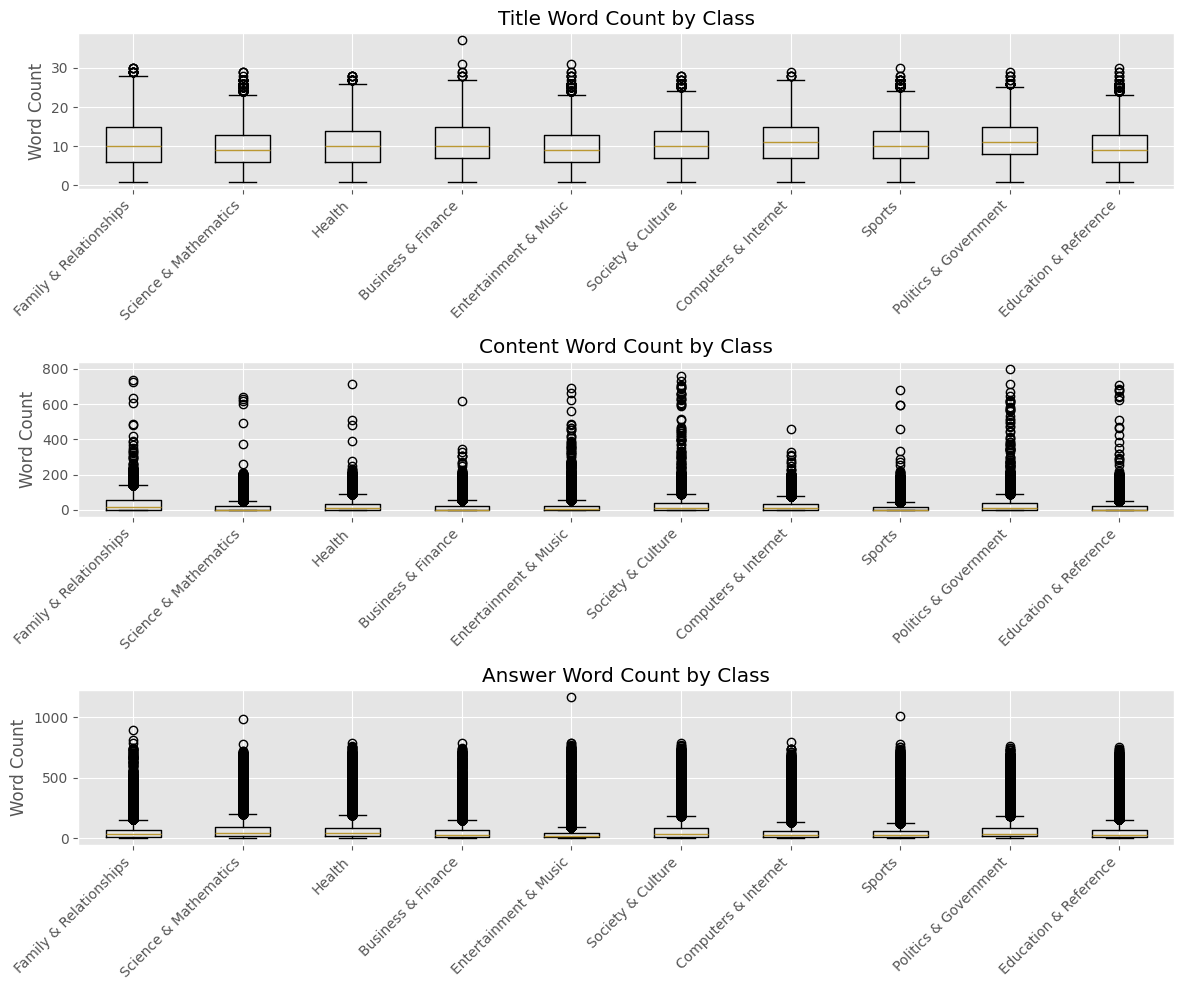

In [ ]:
# Text length distribution by class
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for i, col in enumerate(['Title', 'Content', 'Answer']):
    # Create a boxplot of text length by class
    data_to_plot = []
    classes = train['Class'].unique()

    for cls in classes:
        data_to_plot.append(train[train['Class'] == cls][f'{col}_word_count'].values)

    axes[i].boxplot(data_to_plot)
    axes[i].set_title(f'{col} Word Count by Class')
    axes[i].set_ylabel('Word Count')
    axes[i].set_xticklabels(classes, rotation=45, ha='right')

plt.tight_layout()
plt.show()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Analyzing Title word frequencies...


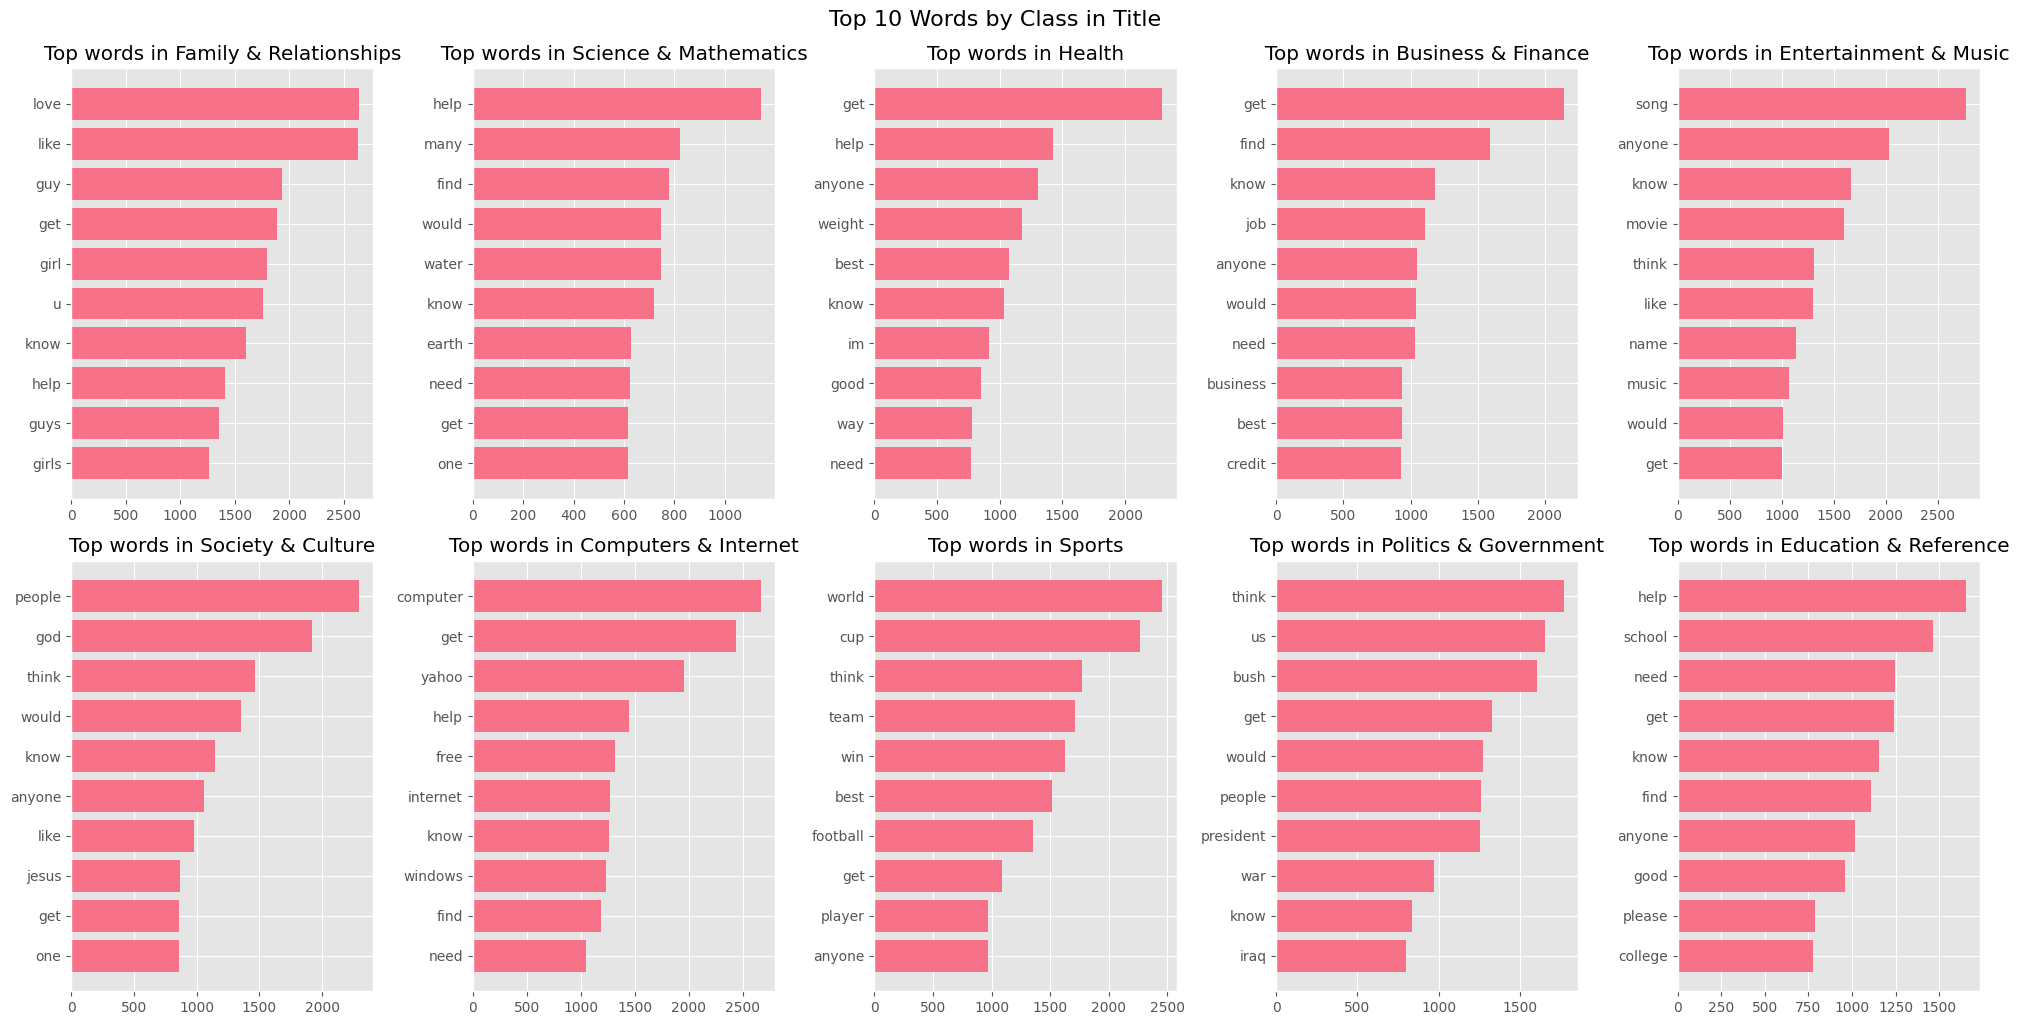

Analyzing Content word frequencies...


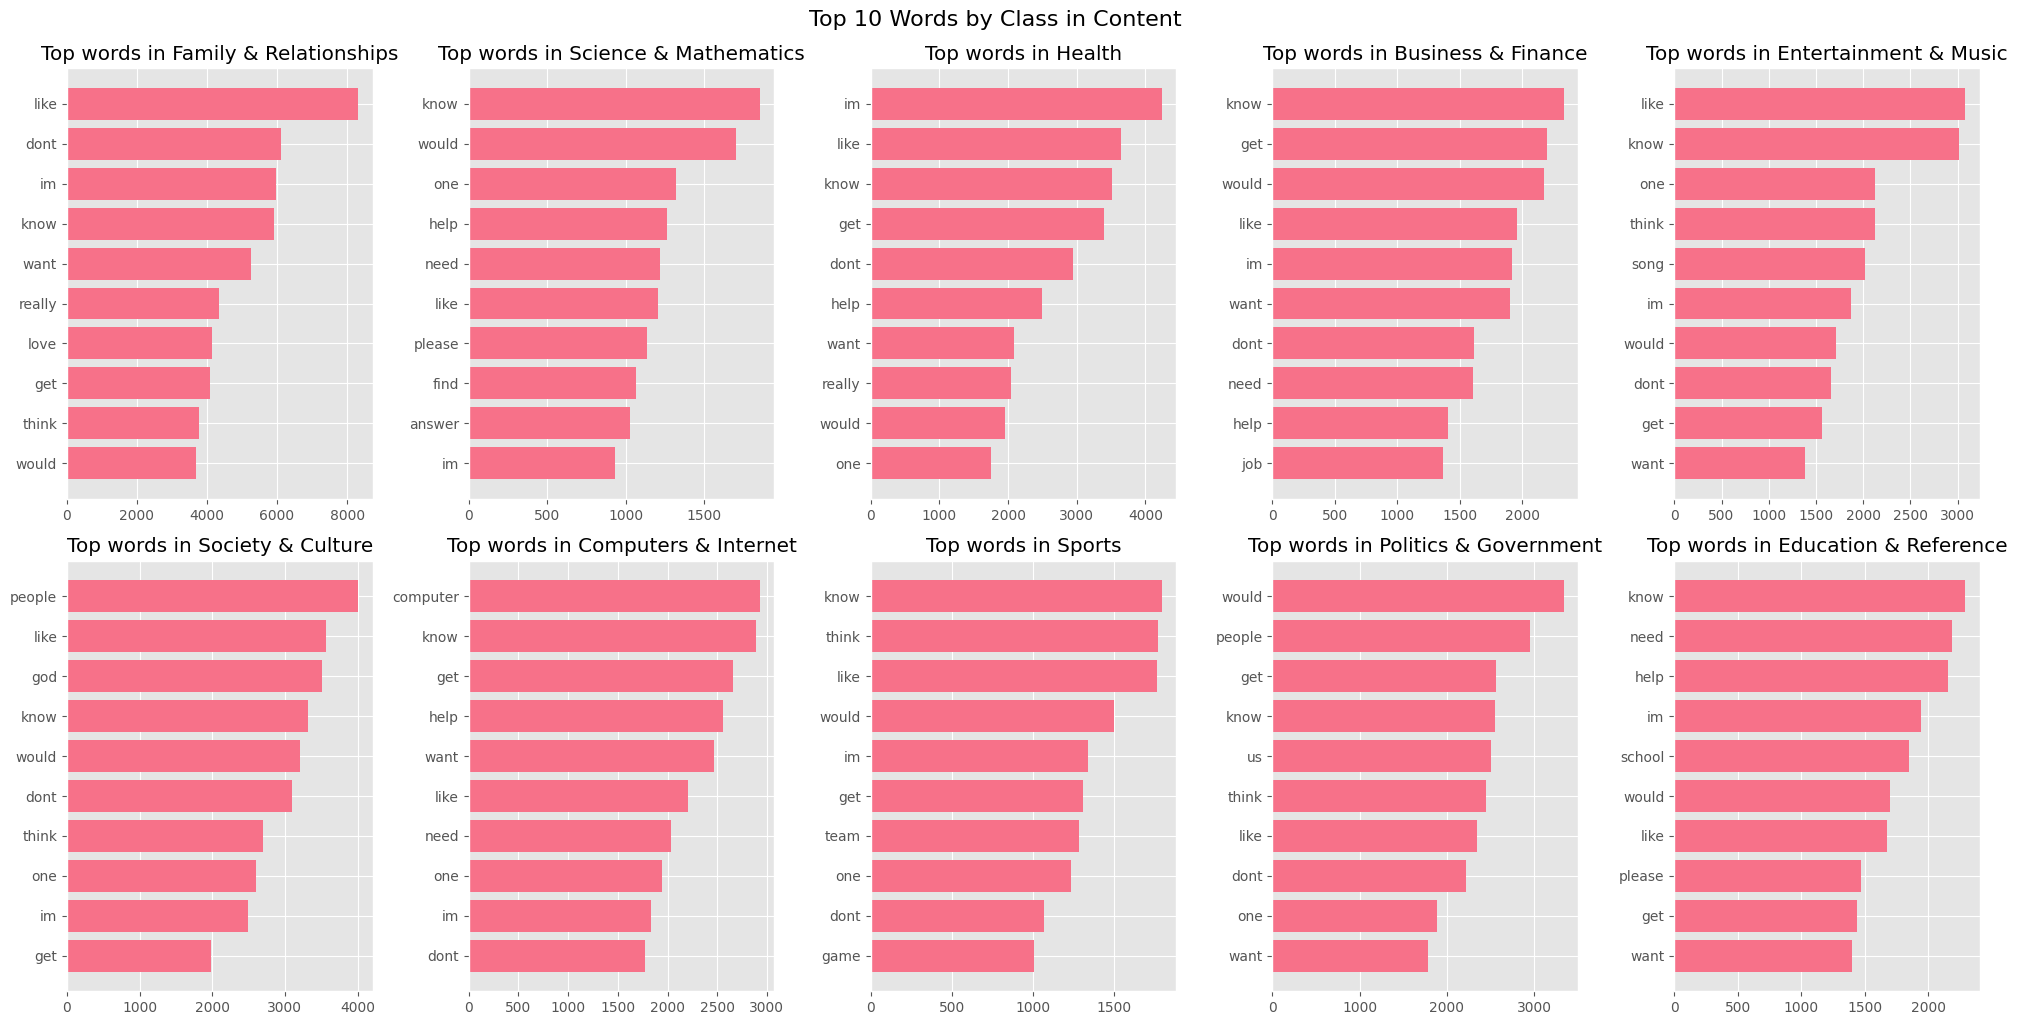

Analyzing Answer word frequencies...


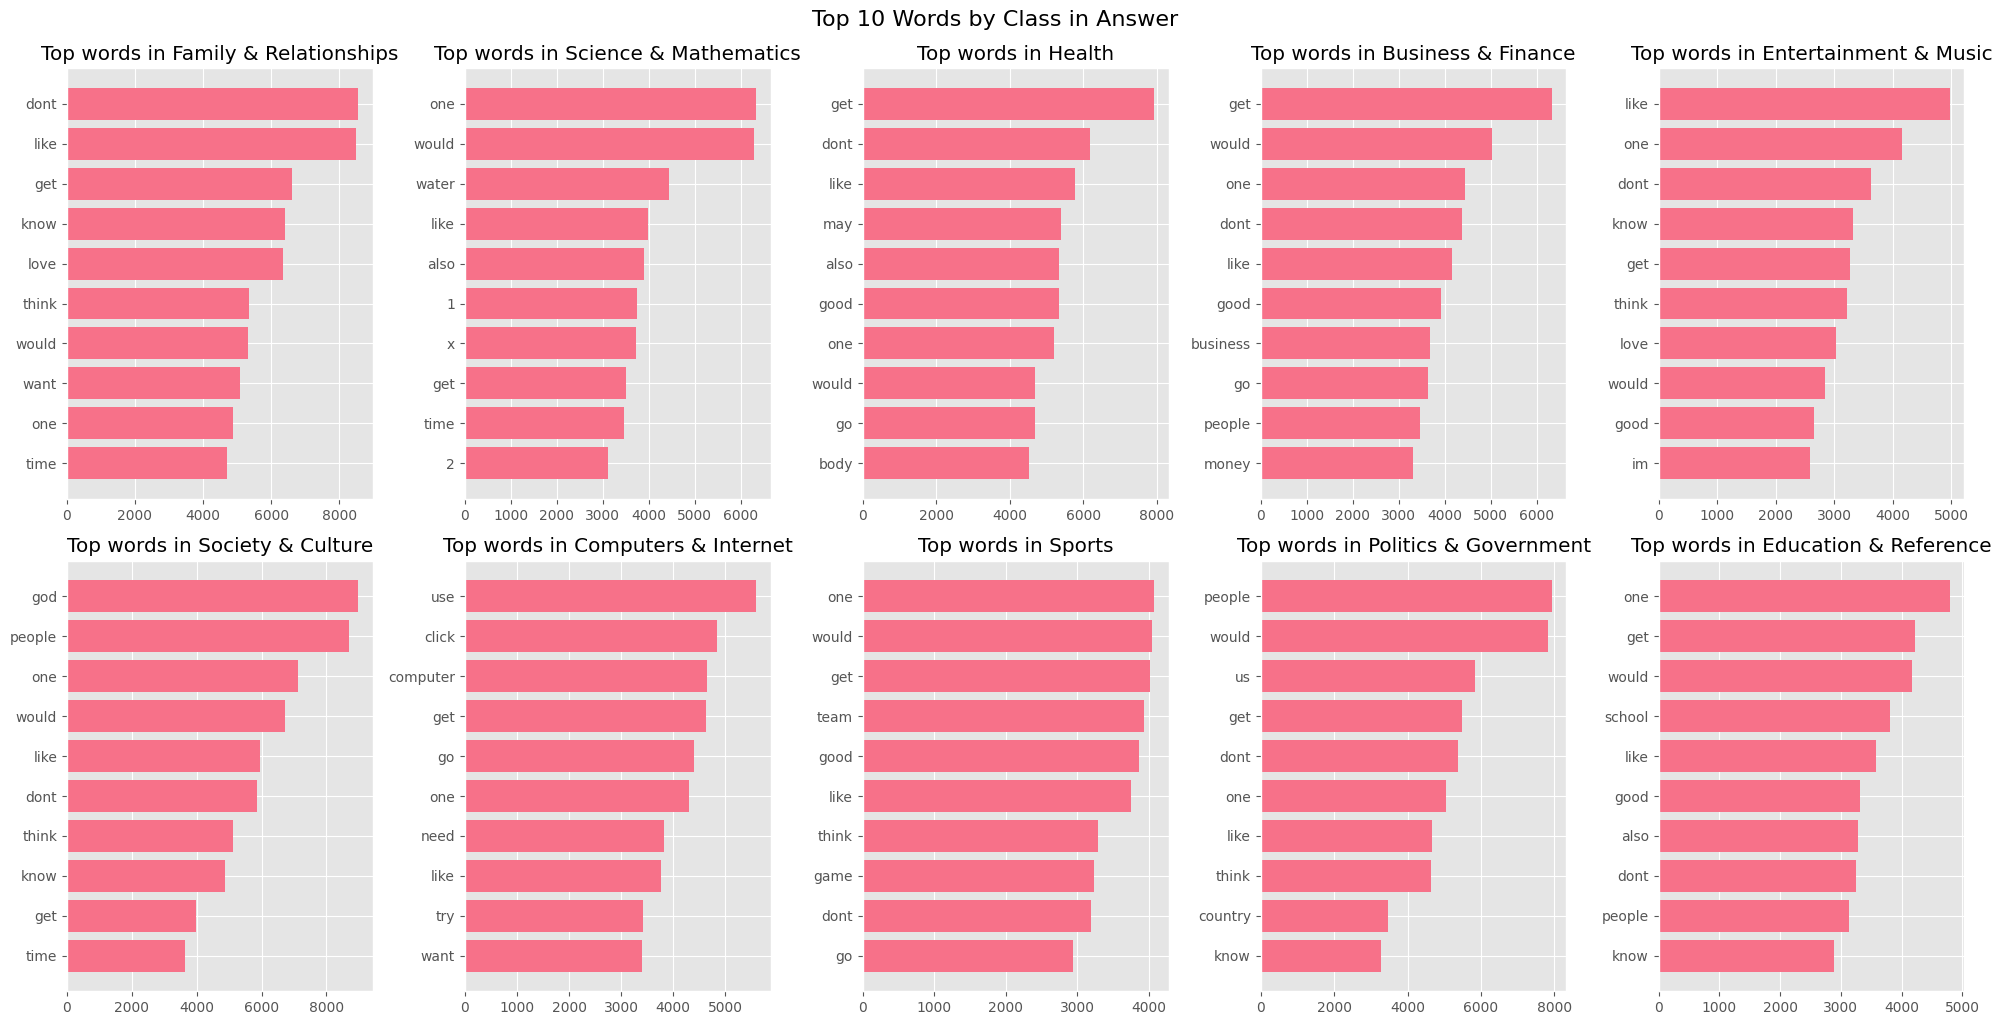

In [ ]:
import nltk
nltk.download('punkt_tab')

# Preprocessing function for text analysis
def preprocess_text(text):
    if pd.isna(text) or text == "":
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Analyze word frequencies for each class
def analyze_word_frequencies(df, column, top_n=10):
    class_words = {}

    for cls in df['Class'].unique():
        # Combine all text for this class
        all_text = ' '.join(df[df['Class'] == cls][column].astype(str))

        # Preprocess and tokenize
        tokens = preprocess_text(all_text)

        # Count word frequencies
        word_freq = Counter(tokens)
        class_words[cls] = word_freq.most_common(top_n)

    # Create a visualization
    fig, axes = plt.subplots(2, 5, figsize=(20, 10))
    axes = axes.flatten()

    for i, (cls, words) in enumerate(class_words.items()):
        words, counts = zip(*words)
        axes[i].barh(words, counts)
        axes[i].set_title(f'Top words in {cls}')
        axes[i].invert_yaxis()

    plt.tight_layout()
    plt.suptitle(f'Top {top_n} Words by Class in {column}', y=1.02, fontsize=16)
    plt.show()

    return class_words

# Analyze for each text component
print("Analyzing Title word frequencies...")
title_word_freq = analyze_word_frequencies(train, 'Title')

print("Analyzing Content word frequencies...")
content_word_freq = analyze_word_frequencies(train, 'Content')

print("Analyzing Answer word frequencies...")
answer_word_freq = analyze_word_frequencies(train, 'Answer')

Content Presence Analysis:
                  Train   Test
With Content     153942  32893
Without Content  126057  27106


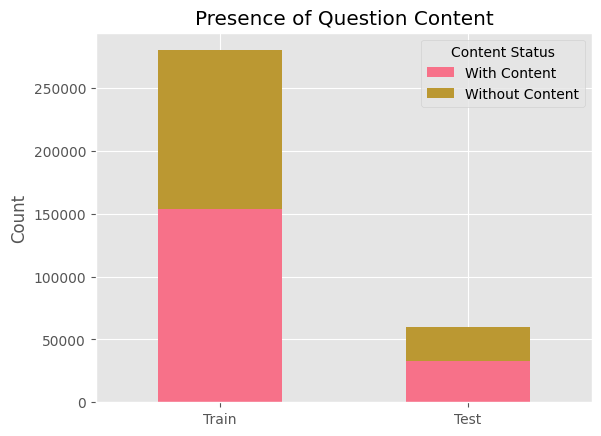

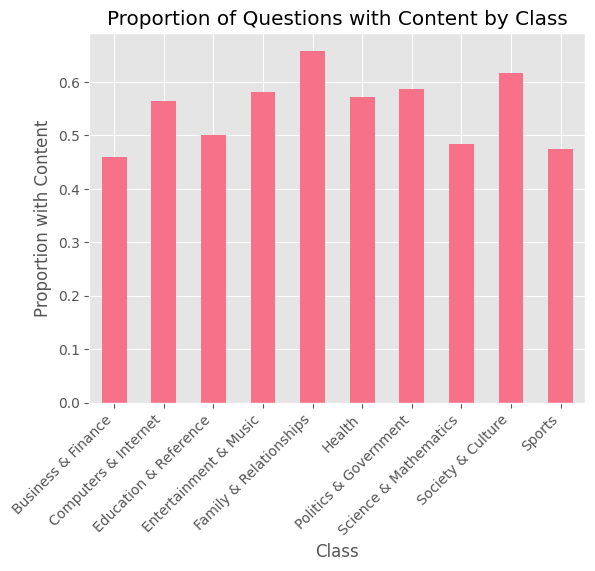

In [ ]:
# Analyze how often Content is provided
content_presence = pd.DataFrame({
    'Train': [(train['Content'] != '').sum(), (train['Content'] == '').sum()],
    'Test': [(test['Content'] != '').sum(), (test['Content'] == '').sum()]
}, index=['With Content', 'Without Content'])

print("Content Presence Analysis:")
print(content_presence)

# Visualize
content_presence.T.plot(kind='bar', stacked=True)
plt.title('Presence of Question Content')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Content Status')
plt.show()

# Check if content presence varies by class
content_by_class = train.groupby('Class')['Content'].apply(lambda x: (x != '').mean())
content_by_class.plot(kind='bar')
plt.title('Proportion of Questions with Content by Class')
plt.ylabel('Proportion with Content')
plt.xticks(rotation=45, ha='right')
plt.show()

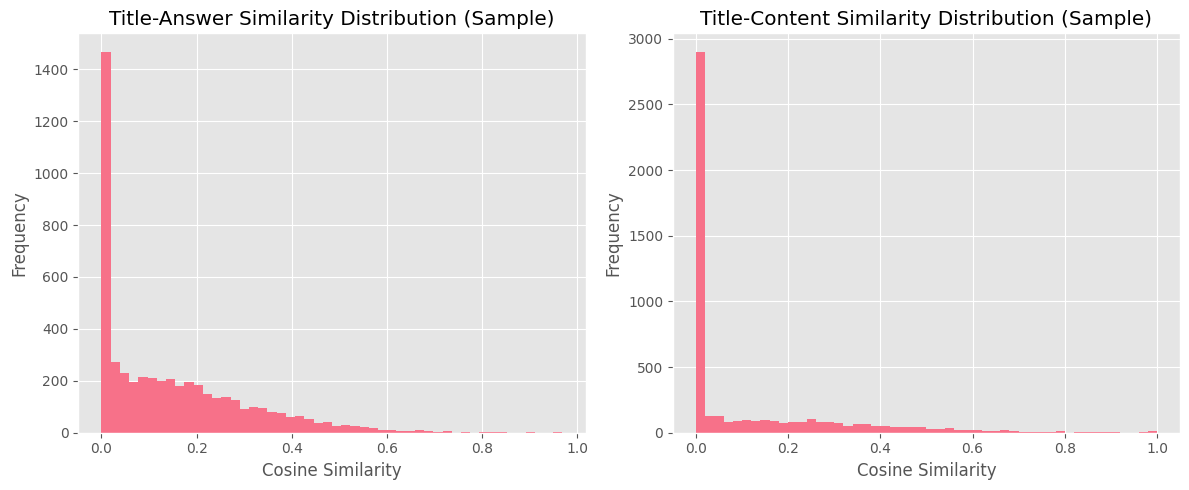

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd # Ensure pandas is imported if not already

# Function to calculate similarity between two text columns for a sample
def calculate_sample_similarity(df, col1, col2, sample_size=5000):
    # Combine a sample of texts to avoid memory issues
    sample_df = df.sample(min(sample_size, len(df)), random_state=42).copy() # Use .copy() to avoid SettingWithCopyWarning

    # Create TF-IDF vectors
    # Limit features to avoid memory issues and focus on most important terms
    vectorizer = TfidfVectorizer(max_features=5000) # Increased max_features for potentially better representation

    # Vectorize both columns - fit_transform on the first column, transform on the second
    vectors1 = vectorizer.fit_transform(sample_df[col1].fillna(''))
    vectors2 = vectorizer.transform(sample_df[col2].fillna(''))

    # Calculate cosine similarity for each row in the sample
    similarities = []
    for i in range(vectors1.shape[0]):
        # Reshape vectors for cosine_similarity which expects 2D arrays
        sim = cosine_similarity(vectors1[i].reshape(1, -1), vectors2[i].reshape(1, -1))[0][0]
        similarities.append(sim)

    return similarities

# Calculate similarities on a sample
sample_title_answer_similarity = calculate_sample_similarity(train, 'Title', 'Answer')
sample_title_content_similarity = calculate_sample_similarity(train, 'Title', 'Content')

# Plot similarity distributions for the sample
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist(sample_title_answer_similarity, bins=50)
axes[0].set_title('Title-Answer Similarity Distribution (Sample)')
axes[0].set_xlabel('Cosine Similarity')
axes[0].set_ylabel('Frequency')

axes[1].hist(sample_title_content_similarity, bins=50)
axes[1].set_title('Title-Content Similarity Distribution (Sample)')
axes[1].set_xlabel('Cosine Similarity')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

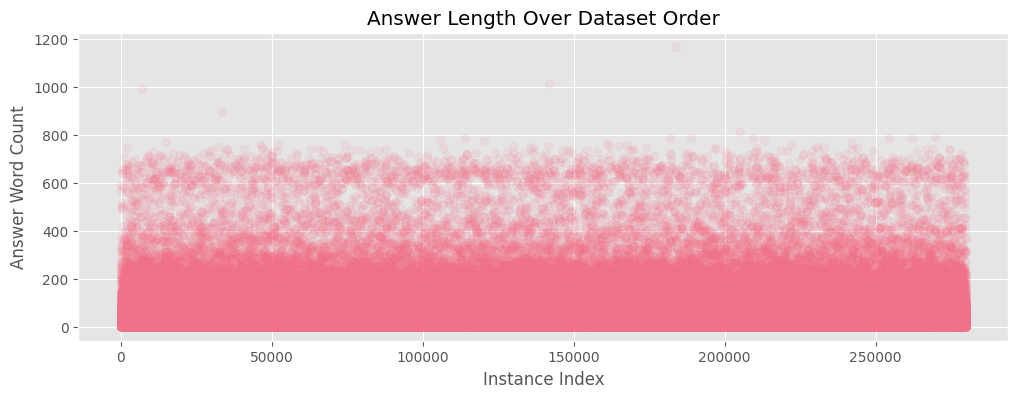

In [ ]:
# Check if there are any temporal patterns in the data
# This assumes your data might have temporal information encoded

# check if there are any patterns in the text length over the index

plt.figure(figsize=(12, 4))
plt.scatter(range(len(train)), train['Answer_word_count'], alpha=0.1)
plt.title('Answer Length Over Dataset Order')
plt.xlabel('Instance Index')
plt.ylabel('Answer Word Count')
plt.show()

In [ ]:
!pip install textstat

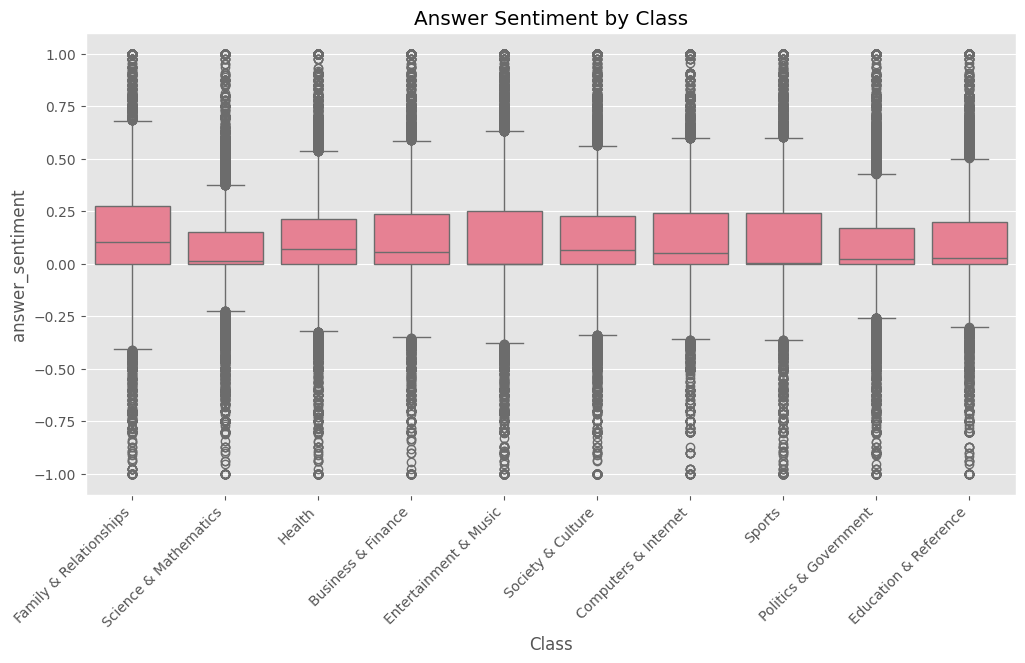

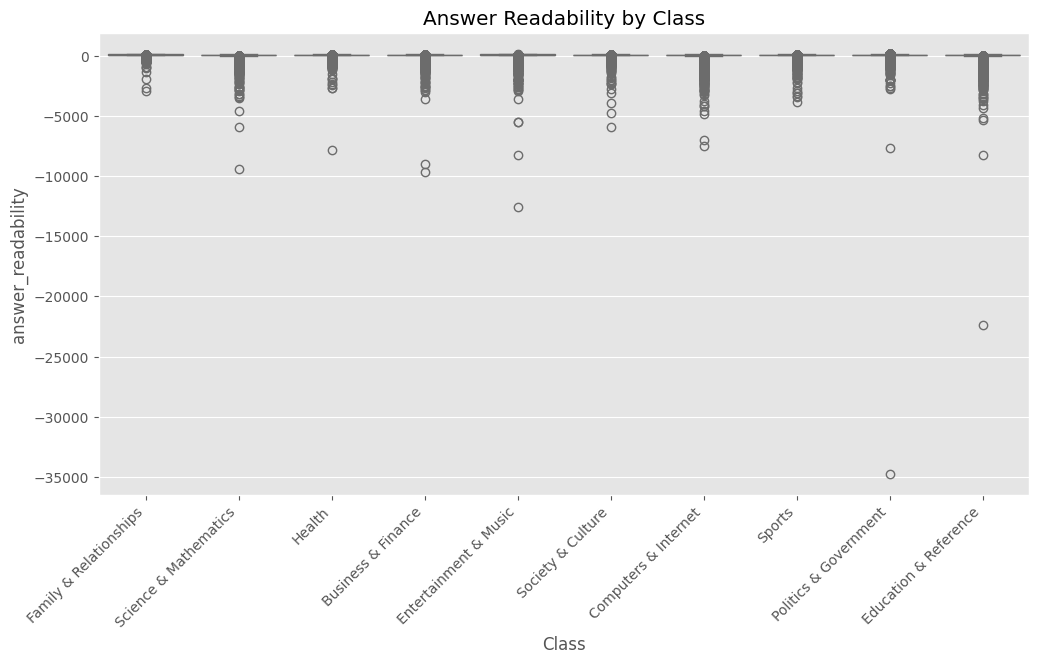

In [ ]:
# Sentiment analysis
from textblob import TextBlob

def get_sentiment(text):
    if pd.isna(text) or text == '':
        return 0
    return TextBlob(text).sentiment.polarity

# Calculate sentiment for answers
train['answer_sentiment'] = train['Answer'].apply(get_sentiment)

# Plot sentiment by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='answer_sentiment', data=train)
plt.title('Answer Sentiment by Class')
plt.xticks(rotation=45, ha='right')
plt.show()

# Readability scores
import textstat

def get_readability(text):
    if pd.isna(text) or text == '':
        return 0
    return textstat.flesch_reading_ease(text)

train['answer_readability'] = train['Answer'].apply(get_readability)

# Plot readability by class
plt.figure(figsize=(12, 6))
sns.boxplot(x='Class', y='answer_readability', data=train)
plt.title('Answer Readability by Class')
plt.xticks(rotation=45, ha='right')
plt.show()

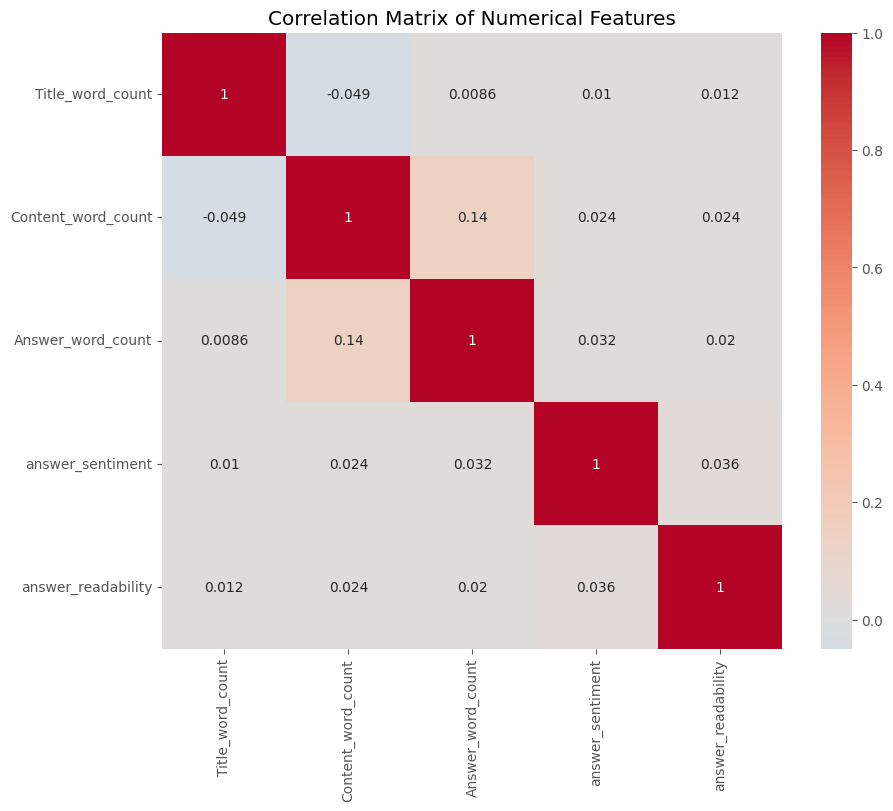

In [ ]:
# Calculate correlations between numerical features
numeric_features = ['Title_word_count', 'Content_word_count', 'Answer_word_count',
                    'answer_sentiment', 'answer_readability']

correlation_matrix = train[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
print("="*50)
print("KEY EDA INSIGHTS SUMMARY")
print("="*50)

# 1. Class distribution
print("1. Class Distribution:")
print(f"   - Train has {train['Class'].nunique()} classes with relatively balanced distribution")
print(f"   - Test has similar class distribution to train")

# 2. Text length patterns
print("\n2. Text Length Patterns:")
print(f"   - Average title length: {train['Title_word_count'].mean():.1f} words")
print(f"   - Average answer length: {train['Answer_word_count'].mean():.1f} words")
print(f"   - Content is often missing: {(train['Content'] == '').mean()*100:.1f}% of cases")

# 3. Word frequency insights
print("\n3. Word Frequency Insights:")
print("   - Each class has distinctive vocabulary patterns")
print("   - Titles tend to be short and question-focused")
print("   - Answers vary in length based on class (e.g., Science answers tend to be longer)")

# 4. Similarity patterns
print("\n4. Similarity Patterns:")
print("   - Similarity analysis was performed on a sample of the data.")
print("   - The distributions showed varying degrees of overlap between Title-Answer and Title-Content, with many pairs having low similarity.")


# 5. Potential challenges
print("\n5. Potential Modeling Challenges:")
print("   - Some classes might be harder to distinguish based on vocabulary alone")
print("   - The missing content field might need special handling")
print("   - Class imbalance (though relatively minor) might affect performance")


KEY EDA INSIGHTS SUMMARY
1. Class Distribution:
   - Train has 10 classes with relatively balanced distribution
   - Test has similar class distribution to train

2. Text Length Patterns:
   - Average title length: 10.7 words
   - Average answer length: 59.2 words
   - Content is often missing: 45.0% of cases

3. Word Frequency Insights:
   - Each class has distinctive vocabulary patterns
   - Titles tend to be short and question-focused
   - Answers vary in length based on class (e.g., Science answers tend to be longer)

4. Similarity Patterns:
   - Similarity analysis was performed on a sample of the data.
   - The distributions showed varying degrees of overlap between Title-Answer and Title-Content, with many pairs having low similarity.

5. Potential Modeling Challenges:
   - Some classes might be harder to distinguish based on vocabulary alone
   - The missing content field might need special handling
   - Class imbalance (though relatively minor) might affect performance


In [ ]:
train.tail(10)

,QA Text,Class,Title,Content,Answer,Title_char_count,Title_word_count,Content_char_count,Content_word_count,Answer_char_count,Answer_word_count,answer_sentiment,answer_readability
279989,Question Title:\nHow many of yall have heard t...,Entertainment & Music,How many of yall have heard that song skakaron ?,,Me.,48,10,0,0,3,1,0.000000,121.220000
279990,Question Title:\nTurning 15 soon and never had...,Family & Relationships,Turning 15 soon and never had like a girlfrien...,I am also homeschooled. and have social anxiet...,"hello , sounds like you are a normal 15 year o...",50,9,161,31,1066,205,0.265079,72.796059
279991,Question Title:\nIn triangle PQR <P=83* <Q=45*...,Education & Reference,In triangle PQR <P=83* <Q=45* and r=18cm solve...,thanks please show ur work,<R= 52* 180-83-45=52. because 3 <s of a triang...,75,12,26,5,339,68,-0.750000,91.396288
279992,Question Title:\nquestion about the lyrics of ...,Education & Reference,question about the lyrics of Canada's national...,"In the official lyrics of ""O Canada"", one sent...","""God, keep our land/Glorious and free""---a dir...",54,8,203,35,130,22,0.262500,57.605000
279993,Question Title:\nhow to avoid blowin & xplodin...,Science & Mathematics,how to avoid blowin & xplodin a meth lab??????...,,Never mind those naysayers. Here's what you d...,56,9,0,0,583,104,0.074306,75.073231
279994,Question Title:\nhow do i know if he's the one...,Family & Relationships,how do i know if he's the one?,,What is described above is often also felt by ...,30,8,0,0,269,52,0.000000,73.730128
279995,Question Title:\nSometimes I get upset at my g...,Family & Relationships,Sometimes I get upset at my girlfriend because...,Whenever I get upset with her...she thinks tha...,You can't make someone agree with you--maybe y...,96,17,146,26,200,35,-0.275000,86.221905
279996,"Question Title:\nIn fact, how much will the Bl...",Society & Culture,"In fact, how much will the Blood Bank give San...",,Blow me santa!,80,18,0,0,14,3,0.000000,90.990000
279997,Question Title:\nlist of germany national team...,Sports,list of germany national team players for the ...,,"Lehmann, Kahn, Hildebrand, Klose, Huth, Neuvil...",61,11,0,0,71,9,0.000000,28.500000
279998,Question Title:\nHow can I find out what Lawye...,Politics & Government,How can I find out what Lawyers in Ohio helped...,,You couldn't find out who helped campaign in t...,66,13,0,0,204,32,0.125000,66.338750


In [ ]:
test.tail(10)

,QA Text,Class,Title,Content,Answer,Title_char_count,Title_word_count,Content_char_count,Content_word_count,Answer_char_count,Answer_word_count
59989,Question Title:\nIs Adam in heaven or hell for...,Society & Culture,Is Adam in heaven or hell for commiting origin...,,First Adam may not even be a real name but a r...,53,10,0,0,492,89
59990,Question Title:\nWhy do the conservatives want...,Politics & Government,Why do the conservatives want us to stay and p...,Cant they see we will just keep losing troops....,George Bush illegally and unconstitutionally i...,57,12,96,18,2998,461
59991,Question Title:\nWho else thinks that ref(uru)...,Sports,Who else thinks that ref(uru) should be reprim...,"Can you believe that guy???? Red card, red car...",What about the obvious handball? The ref shou...,57,8,134,25,60,11
59992,Question Title:\nfirst black president of the ...,Politics & Government,first black president of the united states?,,"Gerald,\n\nThat's easy. You!",43,7,0,0,29,3
59993,Question Title:\nguys only pleez?\nQuestion Co...,Family & Relationships,guys only pleez?,is their anyone out their 4 me who are 13to15 ...,omg i love that in a girrl\nim not looking for...,16,3,91,21,103,17
59994,Question Title:\nif you could be any fantasy f...,Family & Relationships,"if you could be any fantasy figure, who would ...",,"The invisible man, I'd be straight into the gi...",99,19,0,0,66,11
59995,Question Title:\nTell me something about life ...,Entertainment & Music,Tell me something about life most people don't...,"Do you know anything about life, or words of w...",That there is a hell and everyone thinks their...,59,9,94,15,185,37
59996,Question Title:\nWhy are men always thinking o...,Health,Why are men always thinking of sex?,,It's wired in our brain,35,7,0,0,23,5
59997,Question Title:\nest ce que DOMENECH est un en...,Sports,est ce que DOMENECH est un entraineur: 1: de f...,,de foot mais pas pour être sélectionneur d'une...,80,16,0,0,143,24
59998,Question Title:\nNo sound or low sound?\nQuest...,Computers & Internet,No sound or low sound?,I have my volume turned up all the way and hav...,"As an old techie, I tend to look at the hardwa...",22,5,185,42,646,108


In [ ]:
#*****************************************************************

# Create copies for EDA preservation
train_eda = train.copy()
test_eda = test.copy()

# Now create clean datasets for preprocessing
# Select only the columns we need for modeling
features_to_keep = [
    'Title', 'Content', 'Answer',
    'Class'
    # ,  # Keep target for training data
    # 'Title_word_count', 'Answer_word_count',
    # 'answer_sentiment', 'answer_readability',
]

train = train_eda[features_to_keep].copy()
test = test_eda[features_to_keep].copy()


# Verify the new structure
print("Train shape after cleaning:", train.shape)
print("Test shape after cleaning:", test.shape)
print("\nColumns in cleaned datasets:")
print(train.columns.tolist())

Train shape after cleaning: (279999, 4)
Test shape after cleaning: (59999, 4)

Columns in cleaned datasets:
['Title', 'Content', 'Answer', 'Class']


In [ ]:
train.tail(10)

,Title,Content,Answer,Class
279989,How many of yall have heard that song skakaron ?,,Me.,Entertainment & Music
279990,Turning 15 soon and never had like a girlfrien...,I am also homeschooled. and have social anxiet...,"hello , sounds like you are a normal 15 year o...",Family & Relationships
279991,In triangle PQR <P=83* <Q=45* and r=18cm solve...,thanks please show ur work,<R= 52* 180-83-45=52. because 3 <s of a triang...,Education & Reference
279992,question about the lyrics of Canada's national...,"In the official lyrics of ""O Canada"", one sent...","""God, keep our land/Glorious and free""---a dir...",Education & Reference
279993,how to avoid blowin & xplodin a meth lab??????...,,Never mind those naysayers. Here's what you d...,Science & Mathematics
279994,how do i know if he's the one?,,What is described above is often also felt by ...,Family & Relationships
279995,Sometimes I get upset at my girlfriend because...,Whenever I get upset with her...she thinks tha...,You can't make someone agree with you--maybe y...,Family & Relationships
279996,"In fact, how much will the Blood Bank give San...",,Blow me santa!,Society & Culture
279997,list of germany national team players for the ...,,"Lehmann, Kahn, Hildebrand, Klose, Huth, Neuvil...",Sports
279998,How can I find out what Lawyers in Ohio helped...,,You couldn't find out who helped campaign in t...,Politics & Government


In [ ]:
test.tail(10)

,Title,Content,Answer,Class
59989,Is Adam in heaven or hell for commiting origin...,,First Adam may not even be a real name but a r...,Society & Culture
59990,Why do the conservatives want us to stay and p...,Cant they see we will just keep losing troops....,George Bush illegally and unconstitutionally i...,Politics & Government
59991,Who else thinks that ref(uru) should be reprim...,"Can you believe that guy???? Red card, red car...",What about the obvious handball? The ref shou...,Sports
59992,first black president of the united states?,,"Gerald,\n\nThat's easy. You!",Politics & Government
59993,guys only pleez?,is their anyone out their 4 me who are 13to15 ...,omg i love that in a girrl\nim not looking for...,Family & Relationships
59994,"if you could be any fantasy figure, who would ...",,"The invisible man, I'd be straight into the gi...",Family & Relationships
59995,Tell me something about life most people don't...,"Do you know anything about life, or words of w...",That there is a hell and everyone thinks their...,Entertainment & Music
59996,Why are men always thinking of sex?,,It's wired in our brain,Health
59997,est ce que DOMENECH est un entraineur: 1: de f...,,de foot mais pas pour être sélectionneur d'une...,Sports
59998,No sound or low sound?,I have my volume turned up all the way and hav...,"As an old techie, I tend to look at the hardwa...",Computers & Internet


Preparing Strategy 1: Concatenate all text...
Preparing Strategy 2: Separate feature stacking...
Preparing Strategy 3: Title + Answer only...
Preparing Strategy 4: Title only...
Preparing Strategy 5: Answer only...
Preparing Strategy 6: Content only...
Preparing Strategy 7: Title + Content only...

Evaluating Strategy 1: Concatenate all text...
Evaluating Strategy 2: Separate feature stacking...
Evaluating Strategy 3: Title + Answer only...
Evaluating Strategy 4: Title only...
Evaluating Strategy 5: Answer only...
Evaluating Strategy 6: Content only...
Evaluating Strategy 7: Title + Content only...

COMPREHENSIVE FEATURE STRATEGY COMPARISON
Concatenate All Text:
  Accuracy: 0.6594
  F1-Score: 0.6566

Title + Answer Only:
  Accuracy: 0.6397
  F1-Score: 0.6364

Separate Feature Stacking:
  Accuracy: 0.6366
  F1-Score: 0.6344

Title + Content Only:
  Accuracy: 0.6289
  F1-Score: 0.6262

Title Only:
  Accuracy: 0.5909
  F1-Score: 0.5885

Answer Only:
  Accuracy: 0.5331
  F1-Score: 0.5307



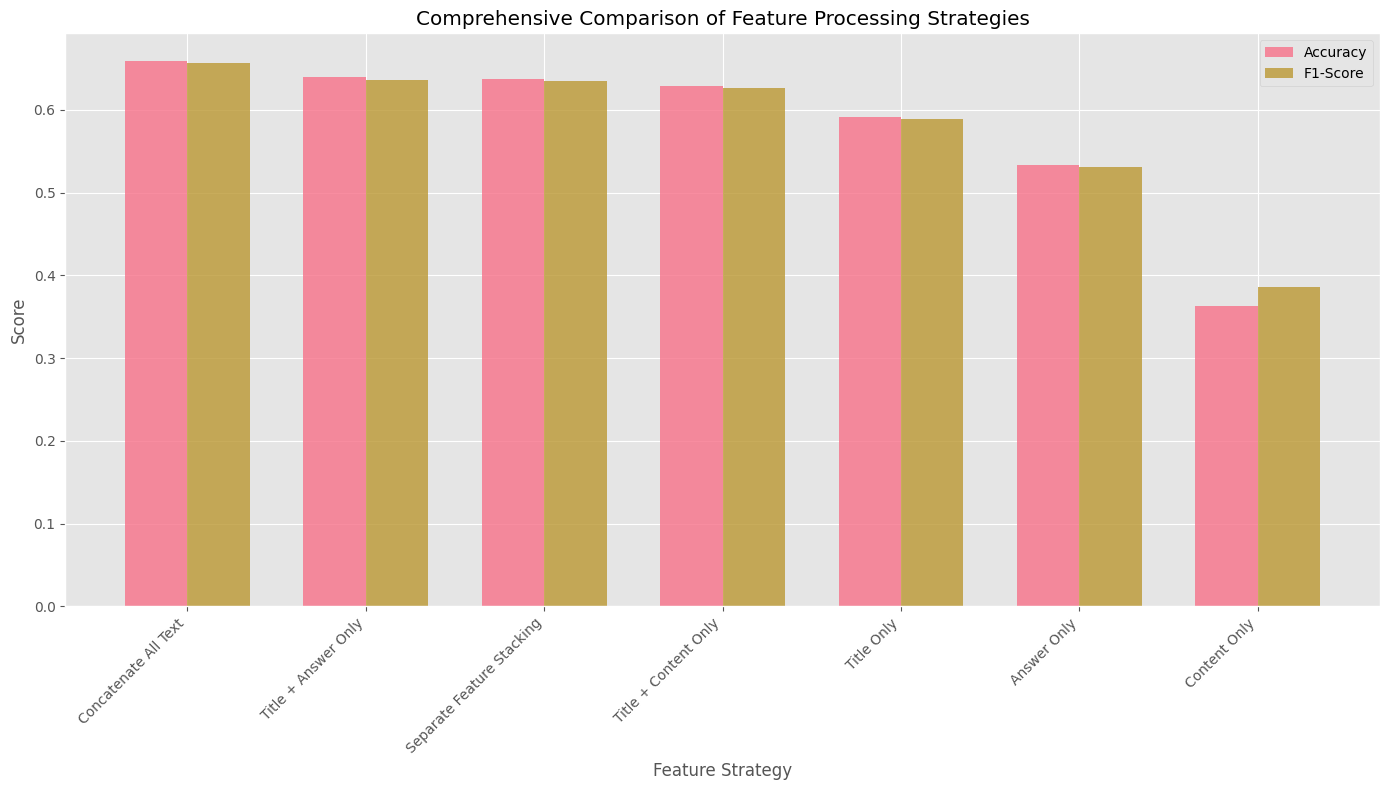


FEATURE IMPORTANCE ANALYSIS
Title Only Accuracy: 0.5909
Answer Only Accuracy: 0.5331
Content Only Accuracy: 0.3625

Improvement from adding Answer to Title: 0.0488
Improvement from adding Content to Title: 0.0380
Improvement from adding both Answer and Content: 0.0685

Synergy benefit from combining all features: 0.0685
The features have positive synergy - they work better together than individually!


In [ ]:
# Running different feature sets on Logistic Regression using TF-IDF to know if I should merge all the text column or vectorize them seperately then merge them

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

def evaluate_feature_strategy(X_train, X_test, y_train, y_test, strategy_name):
    """Train and evaluate a model with given features"""
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds, average='macro')

    return {
        'strategy': strategy_name,
        'accuracy': accuracy,
        'f1_score': f1,
        'model': model
    }

# Prepare the data
df = train_eda.copy()
df['Content'] = df['Content'].fillna('')

# Split the data (keeping all features together)
X = df[['Title', 'Content', 'Answer']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Strategy 1: Concatenate all text
print("Preparing Strategy 1: Concatenate all text...")
X_train_concat = X_train['Title'] + " " + X_train['Content'] + " " + X_train['Answer']
X_test_concat = X_test['Title'] + " " + X_test['Content'] + " " + X_test['Answer']

vectorizer_concat = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_concat_vec = vectorizer_concat.fit_transform(X_train_concat)
X_test_concat_vec = vectorizer_concat.transform(X_test_concat)

# Strategy 2: Keep features separate and stack
print("Preparing Strategy 2: Separate feature stacking...")
title_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 3))  # More n-grams for title
content_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
answer_vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))

X_train_title_vec = title_vectorizer.fit_transform(X_train['Title'])
X_test_title_vec = title_vectorizer.transform(X_test['Title'])

X_train_content_vec = content_vectorizer.fit_transform(X_train['Content'])
X_test_content_vec = content_vectorizer.transform(X_test['Content'])

X_train_answer_vec = answer_vectorizer.fit_transform(X_train['Answer'])
X_test_answer_vec = answer_vectorizer.transform(X_test['Answer'])

# Stack the features
from scipy.sparse import hstack
X_train_stacked = hstack([X_train_title_vec, X_train_content_vec, X_train_answer_vec])
X_test_stacked = hstack([X_test_title_vec, X_test_content_vec, X_test_answer_vec])

# Strategy 3: Title + Answer only
print("Preparing Strategy 3: Title + Answer only...")
X_train_title_answer = X_train['Title'] + " " + X_train['Answer']
X_test_title_answer = X_test['Title'] + " " + X_test['Answer']

vectorizer_title_answer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_title_answer_vec = vectorizer_title_answer.fit_transform(X_train_title_answer)
X_test_title_answer_vec = vectorizer_title_answer.transform(X_test_title_answer)

# Strategy 4: Title only
print("Preparing Strategy 4: Title only...")
title_only_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3))
X_train_title_only_vec = title_only_vectorizer.fit_transform(X_train['Title'])
X_test_title_only_vec = title_only_vectorizer.transform(X_test['Title'])

# Strategy 5: Answer only (NEW)
print("Preparing Strategy 5: Answer only...")
answer_only_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_answer_only_vec = answer_only_vectorizer.fit_transform(X_train['Answer'])
X_test_answer_only_vec = answer_only_vectorizer.transform(X_test['Answer'])

# Strategy 6: Content only (NEW)
print("Preparing Strategy 6: Content only...")
content_only_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_content_only_vec = content_only_vectorizer.fit_transform(X_train['Content'])
X_test_content_only_vec = content_only_vectorizer.transform(X_test['Content'])

# Strategy 7: Title + Content only (NEW)
print("Preparing Strategy 7: Title + Content only...")
X_train_title_content = X_train['Title'] + " " + X_train['Content']
X_test_title_content = X_test['Title'] + " " + X_test['Content']

vectorizer_title_content = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_title_content_vec = vectorizer_title_content.fit_transform(X_train_title_content)
X_test_title_content_vec = vectorizer_title_content.transform(X_test_title_content)

# Evaluate all strategies
results = []

print("\nEvaluating Strategy 1: Concatenate all text...")
results.append(evaluate_feature_strategy(
    X_train_concat_vec, X_test_concat_vec, y_train, y_test,
    "Concatenate All Text"
))

print("Evaluating Strategy 2: Separate feature stacking...")
results.append(evaluate_feature_strategy(
    X_train_stacked, X_test_stacked, y_train, y_test,
    "Separate Feature Stacking"
))

print("Evaluating Strategy 3: Title + Answer only...")
results.append(evaluate_feature_strategy(
    X_train_title_answer_vec, X_test_title_answer_vec, y_train, y_test,
    "Title + Answer Only"
))

print("Evaluating Strategy 4: Title only...")
results.append(evaluate_feature_strategy(
    X_train_title_only_vec, X_test_title_only_vec, y_train, y_test,
    "Title Only"
))

print("Evaluating Strategy 5: Answer only...")
results.append(evaluate_feature_strategy(
    X_train_answer_only_vec, X_test_answer_only_vec, y_train, y_test,
    "Answer Only"
))

print("Evaluating Strategy 6: Content only...")
results.append(evaluate_feature_strategy(
    X_train_content_only_vec, X_test_content_only_vec, y_train, y_test,
    "Content Only"
))

print("Evaluating Strategy 7: Title + Content only...")
results.append(evaluate_feature_strategy(
    X_train_title_content_vec, X_test_title_content_vec, y_train, y_test,
    "Title + Content Only"
))

# Compare results
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("COMPREHENSIVE FEATURE STRATEGY COMPARISON")
print("="*70)

# Sort by accuracy for better visualization
results_df = results_df.sort_values('accuracy', ascending=False)

for _, row in results_df.iterrows():
    print(f"{row['strategy']}:")
    print(f"  Accuracy: {row['accuracy']:.4f}")
    print(f"  F1-Score: {row['f1_score']:.4f}")
    print()

# Find the best strategy
best_strategy = results_df.loc[results_df['accuracy'].idxmax()]
print(f"BEST STRATEGY: {best_strategy['strategy']}")
print(f"BEST ACCURACY: {best_strategy['accuracy']:.4f}")
print(f"BEST F1-SCORE: {best_strategy['f1_score']:.4f}")

# Visual comparison
plt.figure(figsize=(14, 8))
strategies = results_df['strategy']
accuracies = results_df['accuracy']
f1_scores = results_df['f1_score']

x = np.arange(len(strategies))
width = 0.35

plt.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
plt.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)

plt.xlabel('Feature Strategy')
plt.ylabel('Score')
plt.title('Comprehensive Comparison of Feature Processing Strategies')
plt.xticks(x, strategies, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Feature importance analysis
print("\n" + "="*70)
print("FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Calculate the relative importance of each feature
title_only_result = results_df[results_df['strategy'] == 'Title Only'].iloc[0]
answer_only_result = results_df[results_df['strategy'] == 'Answer Only'].iloc[0]
content_only_result = results_df[results_df['strategy'] == 'Content Only'].iloc[0]

print(f"Title Only Accuracy: {title_only_result['accuracy']:.4f}")
print(f"Answer Only Accuracy: {answer_only_result['accuracy']:.4f}")
print(f"Content Only Accuracy: {content_only_result['accuracy']:.4f}")

# Calculate improvement from adding features
title_answer_result = results_df[results_df['strategy'] == 'Title + Answer Only'].iloc[0]
title_content_result = results_df[results_df['strategy'] == 'Title + Content Only'].iloc[0]
all_features_result = results_df[results_df['strategy'] == 'Concatenate All Text'].iloc[0]

print(f"\nImprovement from adding Answer to Title: {title_answer_result['accuracy'] - title_only_result['accuracy']:.4f}")
print(f"Improvement from adding Content to Title: {title_content_result['accuracy'] - title_only_result['accuracy']:.4f}")
print(f"Improvement from adding both Answer and Content: {all_features_result['accuracy'] - title_only_result['accuracy']:.4f}")

# Check if combining features provides synergistic benefits
synergy_benefit = all_features_result['accuracy'] - max(title_only_result['accuracy'],
                                                       answer_only_result['accuracy'],
                                                       content_only_result['accuracy'])
print(f"\nSynergy benefit from combining all features: {synergy_benefit:.4f}")

if synergy_benefit > 0:
    print("The features have positive synergy - they work better together than individually!")
else:
    print("The features do not show positive synergy - the best individual feature performs as well as the combination.")

In [ ]:
# Concatanating Question Title, Question Content and Best Answer gives the best result. So, we will use this method for our project

# **DATA PREPROCESSING**

In [ ]:
!pip install gensim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train = pd.read_csv("/content/drive/MyDrive/440_project_files/train.csv")
test = pd.read_csv("/content/drive/MyDrive/440_project_files/test.csv")
# quick
print(len(train), 'train rows')
print(len(test), 'test rows')


279999 train rows
59999 test rows


In [ ]:
# combines the "QA Text" column's question title, content and answer part in a single text

def combine_qa_text(df):
    combined_text = []
    for index, row in df.iterrows():
        text = row['QA Text']
        # Since the format is consistent: "Question Title:\n...\nQuestion Body:\n...\nAnswer:\n..."
        parts = text.split('\n')
        title = parts[1] if len(parts) > 1 else ""
        body = parts[3] if len(parts) > 3 else ""
        answer = parts[5] if len(parts) > 5 else ""
        combined_text.append(title + " " + body + " " + answer)
    df['combined_text'] = combined_text
    return df

train = combine_qa_text(train.copy())
test = combine_qa_text(test.copy())

# Display the first few rows with the new column
display(train.head())

,QA Text,Class,combined_text
0,Question Title:\nHave you liked a person who i...,Family & Relationships,Have you liked a person who is bi-sexual and c...
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics,what is simulation? means that simulate the p...
2,Question Title:\nhelp to loose weight?\nQuest...,Health,help to loose weight? burn more calories the...
3,Question Title:\nDid you know that the KKK ado...,Business & Finance,Did you know that the KKK adopted a highway? ...
4,Question Title:\nhow can i find an old friend ...,Family & Relationships,how can i find an old friend in the uk? try f...


In [ ]:
import re

def clean_text(text):
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    return text

train['cleaned_text'] = train['combined_text'].apply(clean_text)
test['cleaned_text'] = test['combined_text'].apply(clean_text)

# Display the first few rows with the new cleaned_text column
display(train.head())

,QA Text,Class,combined_text,cleaned_text
0,Question Title:\nHave you liked a person who i...,Family & Relationships,Have you liked a person who is bi-sexual and c...,have you liked a person who is bisexual and co...
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics,what is simulation? means that simulate the p...,what is simulation means that simulate the ph...
2,Question Title:\nhelp to loose weight?\nQuest...,Health,help to loose weight? burn more calories the...,help to loose weight burn more calories then...
3,Question Title:\nDid you know that the KKK ado...,Business & Finance,Did you know that the KKK adopted a highway? ...,did you know that the kkk adopted a highway y...
4,Question Title:\nhow can i find an old friend ...,Family & Relationships,how can i find an old friend in the uk? try f...,how can i find an old friend in the uk try fr...


Most common words in the training data:
[('the', 1078672), ('to', 714504), ('and', 611622), ('a', 608977), ('of', 483956), ('i', 480165), ('is', 444097), ('you', 438466), ('in', 369792), ('it', 318529), ('that', 293010), ('for', 247906), ('are', 201548), ('have', 195286), ('on', 177956), ('be', 171954), ('or', 161669), ('with', 160156), ('do', 156381), ('your', 154830)]


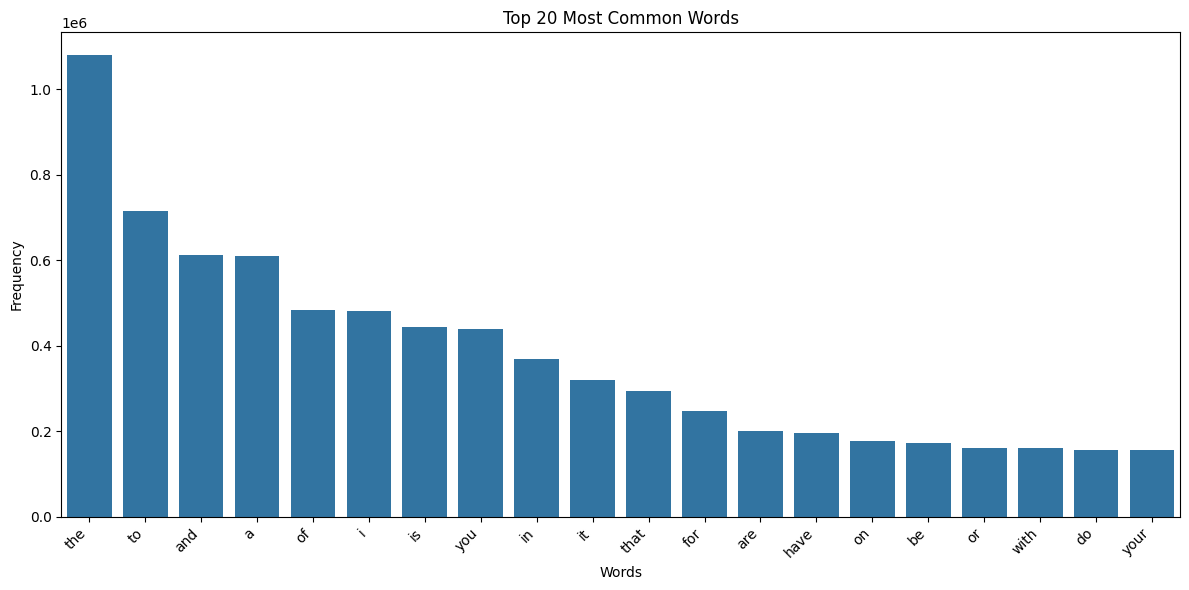

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Combine all cleaned text from the training data
all_cleaned_text = " ".join(train['cleaned_text'].tolist())

# Get the most common words
words = all_cleaned_text.split()
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most common words in the training data:")
print(most_common_words)

# Visualize the most common words
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 20 Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if its not downloaded already
try:
    stopwords = stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
    stopwords = stopwords.words('english')

def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stopwords])

train['cleaned_text_no_stopwords'] = train['cleaned_text'].apply(remove_stopwords)
test['cleaned_text_no_stopwords'] = test['cleaned_text'].apply(remove_stopwords)

# Display the first few rows with the new column
display(train.head())

,QA Text,Class,combined_text,cleaned_text,cleaned_text_no_stopwords
0,Question Title:\nHave you liked a person who i...,Family & Relationships,Have you liked a person who is bi-sexual and c...,have you liked a person who is bisexual and co...,liked person bisexual couldnt get relationship...
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics,what is simulation? means that simulate the p...,what is simulation means that simulate the ph...,simulation means simulate phenomena visualize ...
2,Question Title:\nhelp to loose weight?\nQuest...,Health,help to loose weight? burn more calories the...,help to loose weight burn more calories then...,help loose weight burn calories take way exerc...
3,Question Title:\nDid you know that the KKK ado...,Business & Finance,Did you know that the KKK adopted a highway? ...,did you know that the kkk adopted a highway y...,know kkk adopted highway yes near omaha arkans...
4,Question Title:\nhow can i find an old friend ...,Family & Relationships,how can i find an old friend in the uk? try f...,how can i find an old friend in the uk try fr...,find old friend uk try friends reunited


In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet and OMW if you haven't already
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

try:
    nltk.data.find('corpora/omw-1.4')
except LookupError:
    nltk.download('omw-1.4')


wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])

train['cleaned_text_lemmatized'] = train['cleaned_text_no_stopwords'].apply(lemmatize_text)
test['cleaned_text_lemmatized'] = test['cleaned_text_no_stopwords'].apply(lemmatize_text)

# Display the first few rows with the new column
display(train.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,QA Text,Class,combined_text,cleaned_text,cleaned_text_no_stopwords,cleaned_text_lemmatized
0,Question Title:\nHave you liked a person who i...,Family & Relationships,Have you liked a person who is bi-sexual and c...,have you liked a person who is bisexual and co...,liked person bisexual couldnt get relationship...,liked person bisexual couldnt get relationship...
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics,what is simulation? means that simulate the p...,what is simulation means that simulate the ph...,simulation means simulate phenomena visualize ...,simulation mean simulate phenomenon visualize ...
2,Question Title:\nhelp to loose weight?\nQuest...,Health,help to loose weight? burn more calories the...,help to loose weight burn more calories then...,help loose weight burn calories take way exerc...,help loose weight burn calorie take way exerci...
3,Question Title:\nDid you know that the KKK ado...,Business & Finance,Did you know that the KKK adopted a highway? ...,did you know that the kkk adopted a highway y...,know kkk adopted highway yes near omaha arkans...,know kkk adopted highway yes near omaha arkans...
4,Question Title:\nhow can i find an old friend ...,Family & Relationships,how can i find an old friend in the uk? try f...,how can i find an old friend in the uk try fr...,find old friend uk try friends reunited,find old friend uk try friend reunited


In [ ]:
import pandas as pd

# Set display options to show the full content of columns
pd.set_option('display.max_colwidth', None)

# Display the first 20 entries of the 'cleaned_text_lemmatized' column
display(train['cleaned_text_lemmatized'].head(20))

# Reset display options to default
pd.reset_option('display.max_colwidth')

,cleaned_text_lemmatized
0,liked person bisexual couldnt get relationship going im bi sexual orientation probably reason cant get relationship going
1,simulation mean simulate phenomenon visualize actually happen without physically building phenomenon mostly mean cad support
2,help loose weight burn calorie take way exercise eat less
3,know kkk adopted highway yes near omaha arkansas ive seen sign ignorant
4,find old friend uk try friend reunited
5,best low start cost business idea anything entrepreneur magazine good list low cost startup business may want check httpwwwentrepreneurcomlowcostbusinesses0661700htmlnnthe best home business depend want define interesting person may consider pet sitting business exciting work world another person would rather watch tv take care dog nnthe key determine interest want suitable lifestyle overall goal fit resourcesnndan ramsey book 101 best home business chapter find best home business suggests 10 stepsnn1 list 5 thing bestn2 list others would benefit bestn3 find give people wantn4 learn value service othersn5 find else offer similar servicesn6 learn success othersn7 learn failure othersn8 plan successn9 make low cost mistakesn10 enjoy itnnhe made suggestion best home business according type themnnbest business using craft physical skillsn antique restorationn auto detail servicen carpet cleaning businessn erranddelivery servicen housecleaning businessnnbest service business n bed breakfast operatorn caregivern catering servicen senior day care centern tutoring servicennbest professional businessesn desktop publishern magazine writern importexport servicen income tax preparation servicen event plannernnsome home business ideasnntop 10 home business rapid breakeven time httpwwwpowerhomebizcomvol33breakevenhtmn10 profitable goout home business httpwwwpowerhomebizcomvol31goouthtmn6 hottest business web httpwwwpowerhomebizcom052006webhtm nnyou also check following booksnnturn talent profit 100 terrific idea starting homebased microbusiness n best home business 21st century n 121 internet business start home n best internet business start n 101 way make money homennto give idea exactly need start business ten thing need know launching business 10 thing need know starting home business httpwwwpowerhomebizcom052006startingbizhtm
6,make happiest relationship 2 people come together understand know like dislike point nothing world wouldnt make person happy madness going relationship today full getting age tired bull say mate love unconditinoally make happy
7,good comcast hdtv particularly san fransisco bay area comcast carry local network channel hd network show look hd compared ordinary analog tv comcast offer 15 channel hd offer east coast feed premium channel hbo cinemaz etc well local channel like fox abc cbs quality good watch hd programming regular tv nonhd look great hope help
8,come im dumb everything havent experienced enough thing yet take time grow rush
9,love foto woman alder say


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Class' column in the training data
train['Class_Encoded'] = label_encoder.fit_transform(train['Class'])

# Transform the 'Class' column in the test data
test['Class_Encoded'] = label_encoder.transform(test['Class'])

# Display the first few rows with the new encoded class column
display(train.head())


,QA Text,Class,combined_text,cleaned_text,cleaned_text_no_stopwords,cleaned_text_lemmatized,Class_Encoded
0,Question Title:\nHave you liked a person who i...,Family & Relationships,Have you liked a person who is bi-sexual and c...,have you liked a person who is bisexual and co...,liked person bisexual couldnt get relationship...,liked person bisexual couldnt get relationship...,4
1,Question Title:\nwhat is simulation?\nQuestion...,Science & Mathematics,what is simulation? means that simulate the p...,what is simulation means that simulate the ph...,simulation means simulate phenomena visualize ...,simulation mean simulate phenomenon visualize ...,7
2,Question Title:\nhelp to loose weight?\nQuest...,Health,help to loose weight? burn more calories the...,help to loose weight burn more calories then...,help loose weight burn calories take way exerc...,help loose weight burn calorie take way exerci...,5
3,Question Title:\nDid you know that the KKK ado...,Business & Finance,Did you know that the KKK adopted a highway? ...,did you know that the kkk adopted a highway y...,know kkk adopted highway yes near omaha arkans...,know kkk adopted highway yes near omaha arkans...,0
4,Question Title:\nhow can i find an old friend ...,Family & Relationships,how can i find an old friend in the uk? try f...,how can i find an old friend in the uk try fr...,find old friend uk try friends reunited,find old friend uk try friend reunited,4


In [ ]:
print(train.shape)
print(test.shape)

(279999, 7)
(59999, 7)


In [ ]:
train.columns

Index(['QA Text', 'Class', 'combined_text', 'cleaned_text',
       'cleaned_text_no_stopwords', 'cleaned_text_lemmatized',
       'Class_Encoded'],
      dtype='object')

In [ ]:
# training vs validation split (80-20)
from sklearn.model_selection import train_test_split


X = train['cleaned_text_lemmatized']
y = train['Class_Encoded']

# Perform the stratified split (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # This ensures the class distribution is maintained in both sets
)


print(f"Training set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(test)}")  # original test set remains untouched


Training set size: 223999
Validation set size: 56000
Test set size: 59999


# **BAG OF WORDS AND TF-IDF EXPERIMENTS**


EXPERIMENTS WITH BAG OF WORDS

Creating Bag of Words representation...
Bag of Words Training shape: (223999, 8000)
Bag of Words Validation shape: (56000, 8000)

Logistic Regression with Bag of Words
------------------------------------------------------------
  Testing parameters 1/2: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'random_state': 440}
    Accuracy: 0.6678, F1-weighted: 0.6649, F1-macro: 0.6645
    Training time: 32.99 seconds
  Testing parameters 2/2: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'random_state': 440}
    Accuracy: 0.6458, F1-weighted: 0.6431, F1-macro: 0.6427
    Training time: 66.23 seconds

  BEST PARAMETERS: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'random_state': 440}
  VALIDATION ACCURACY: 0.6678

Naive Bayes with Bag of Words
------------------------------------------------------------
  Testing parameters 1/2: {'alpha': 0.5}
    Accuracy: 0.6698, F1-weighted: 0.6661, F1

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.1810 - loss: 2.4754 - val_accuracy: 0.3989 - val_loss: 1.9581 - learning_rate: 5.0000e-04
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.4931 - loss: 1.5471 - val_accuracy: 0.6142 - val_loss: 1.2595 - learning_rate: 5.0000e-04
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6188 - loss: 1.2029 - val_accuracy: 0.6510 - val_loss: 1.1217 - learning_rate: 5.0000e-04
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.6893 - loss: 0.9802 - val_accuracy: 0.6583 - val_loss: 1.1357 - learning_rate: 5.0000e-04
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.7331 - loss: 0.8463 - val_accuracy: 0.6531 - val_loss: 1.1912 - learning_rate: 5.0000e-04
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7776 - loss: 0.7062 - val_accuracy: 0.6555 - val_loss: 1.2087 - learning_rate: 1.0000e-04
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


VALIDATION ACCURACY: 0.6510
F1-weighted: 0.6466, F1-macro: 0.6463
Training time: 52.54 seconds

DNN with TF-IDF
------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - accuracy: 0.1926 - loss: 2.5187 - val_accuracy: 0.1738 - val_loss: 2.2212 - learning_rate: 5.0000e-04
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5437 - loss: 1.4072 - val_accuracy: 0.4814 - val_loss: 1.8068 - learning_rate: 5.0000e-04
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6519 - loss: 1.0966 - val_accuracy: 0.6240 - val_loss: 1.2862 - learning_rate: 5.0000e-04
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7127 - loss: 0.9190 - val_accuracy: 0.6535 - val_loss: 1.1111 - learning_rate: 5.0000e-04
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7638 - loss: 0.7641 - val_accuracy: 0.6555 - val_loss: 1.1738 - learning_rate: 5.0000e-04
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7995 - loss: 0.6436 - val_accuracy: 0.6480 - val_loss: 1.2920 - learning_rate: 5.0000e-04
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accu

VALIDATION ACCURACY: 0.6535
F1-weighted: 0.6515, F1-macro: 0.6512
Training time: 30.47 seconds

COMPREHENSIVE COMPARISON OF ALL MODELS ACROSS BOTH REPRESENTATIONS

Detailed Results Table:
Representation               Model  Validation Accuracy  F1-weighted  F1-macro                                                                                 Parameters
  Bag of Words         Naive Bayes             0.669911     0.666162  0.665858                                                                             {'alpha': 1.0}
  Bag of Words Logistic Regression             0.667768     0.643068  0.642690 {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'random_state': 440}
  Bag of Words                 DNN             0.651000     0.646598  0.646283                           {'architecture': '512-256-128-64', 'dropout': '0.5-0.4-0.3-0.2'}
  Bag of Words       Random Forest             0.534875     0.534394  0.533940                   {'max_depth': 20, 'n_estimators': 5

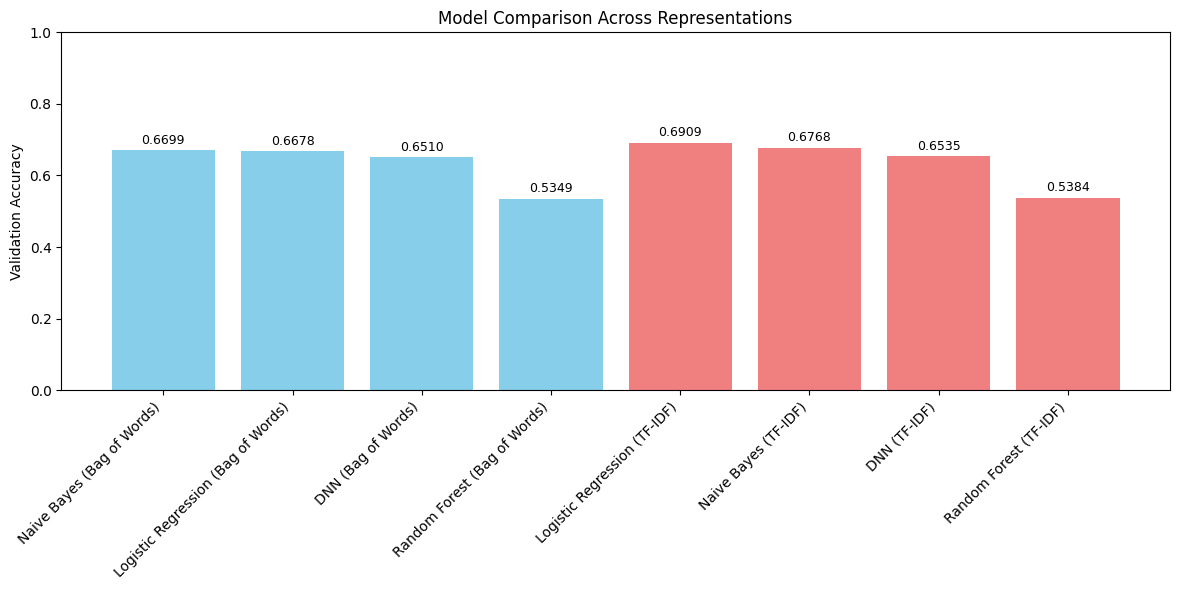


BEST OVERALL MODEL: Logistic Regression with TF-IDF
   Validation Accuracy: 0.6909
   Parameters: {'C': 1.0, 'class_weight': 'balanced', 'max_iter': 500, 'n_jobs': -1, 'random_state': 440}

Total execution time: 5.08 minutes

All experiments completed successfully!
Files saved:
   - bag_of_words_vectorizer.pkl
   - tfidf_vectorizer.pkl
   - All model files (.pkl for ML models, .h5 for DNN)
   - all_experiment_results.pkl (all results)
   - model_comparison.png
   - model_comparison_results.csv

BEST MODEL WITH BAG OF WORDS: Naive Bayes
Validation Accuracy: 0.6699
F1-weighted: 0.6662
F1-macro: 0.6659
Parameters: {'alpha': 1.0}

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.49      0.52      5545
           1       0.79      0.84      0.82      5593
           2       0.56      0.44      0.49      5550
           3       0.59      0.69      0.64      5592
           4       0.59      0.80      0.68      5627
           5    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import ParameterGrid
import joblib
import pickle
import gc  # Garbage collection

# Record start time
start_time = time.time()

# Initialize results storage
all_results = {}

# Define the vectorizers with even more conservative settings
vectorizers = {
    "Bag of Words": CountVectorizer(max_features=20000, ngram_range=(1, 2)),
    "TF-IDF": TfidfVectorizer(max_features=20000, ngram_range=(1, 2))
}

# Define models and hyperparameters with more conservative settings
models_config = {
    "Logistic Regression": {
        "class": LogisticRegression,
        "params": {
            "C": [0.1, 1.0], # Regularization strength (lower = stronger)
            "class_weight": ["balanced"],  # Only balanced to reduce combinations
            "random_state": [440],
            "max_iter": [500],
            "n_jobs": [-1]
        }
    },
    "Naive Bayes": {
        "class": MultinomialNB,
        "params": {
            "alpha": [0.5, 1.0] #to avid z proba
        }
    },
    "Random Forest": {
        "class": RandomForestClassifier,
        "params": {
            "n_estimators": [50],  # Reduced further
            "max_depth": [20],  # Only one depth to reduce combinations
            "random_state": [440],
            "n_jobs": [-1]
        }
    }
}

# Process one vectorizer at a time to save memory
vec_name = "Bag of Words"  # Start with Bag of Words
vectorizer = vectorizers[vec_name]

print(f"\n{'='*70}")
print(f"EXPERIMENTS WITH {vec_name.upper()}")
print(f"{'='*70}")

# Vectorize the data
print(f"\nCreating {vec_name} representation...")
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
print(f"{vec_name} Training shape: {X_train_vec.shape}")
print(f"{vec_name} Validation shape: {X_val_vec.shape}")

# Store vectorizer
joblib.dump(vectorizer, f'{vec_name.lower().replace(" ", "_")}_vectorizer.pkl')

# Initialize results for this vectorizer
vec_results = {}

# Train and evaluate traditional ML models
for model_name, config in models_config.items():
    print(f"\n{model_name} with {vec_name}")
    print("-" * 60)

    best_accuracy = 0
    best_params = None
    best_model = None
    best_predictions = None

    # Generate all parameter combinations
    param_list = list(ParameterGrid(config["params"]))

    for i, params in enumerate(param_list):
        print(f"  Testing parameters {i+1}/{len(param_list)}: {params}")
        model_start_time = time.time()

        # Create and train model
        model = config["class"](**params)
        model.fit(X_train_vec, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val_vec)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        f1_weighted = f1_score(y_val, y_val_pred, average='weighted')
        f1_macro = f1_score(y_val, y_val_pred, average='macro')
        training_time = time.time() - model_start_time

        print(f"    Accuracy: {accuracy:.4f}, F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")
        print(f"    Training time: {training_time:.2f} seconds")

        # Check if this is the best performing parameter set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model
            best_predictions = y_val_pred

        # Force garbage collection to free memory
        del model
        gc.collect()

    # Store results for this model
    vec_results[model_name] = {
        'best_accuracy': best_accuracy,
        'best_f1_weighted': f1_weighted,
        'best_f1_macro': f1_macro,
        'best_params': best_params,
        'model': best_model,
        'predictions': best_predictions
    }

    print(f"\n  BEST PARAMETERS: {best_params}")
    print(f"  VALIDATION ACCURACY: {best_accuracy:.4f}")

    # Save the model
    joblib.dump(best_model, f'{vec_name.lower().replace(" ", "_")}_{model_name.lower().replace(" ", "_")}_model.pkl')

    # Free memory
    del best_model
    gc.collect()

# Free ML training data before DNN
del X_train_vec, X_val_vec
gc.collect()

# Now process TF-IDF separately to save memory
vec_name = "TF-IDF"
vectorizer = vectorizers[vec_name]

print(f"\n{'='*70}")
print(f"EXPERIMENTS WITH {vec_name.upper()}")
print(f"{'='*70}")

# Vectorize the data
print(f"\nCreating {vec_name} representation...")
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
print(f"{vec_name} Training shape: {X_train_vec.shape}")
print(f"{vec_name} Validation shape: {X_val_vec.shape}")

# Store vectorizer
joblib.dump(vectorizer, f'{vec_name.lower().replace(" ", "_")}_vectorizer.pkl')

# Initialize results for this vectorizer
vec_results_tfidf = {}

# Train and evaluate traditional ML models
for model_name, config in models_config.items():
    print(f"\n{model_name} with {vec_name}")
    print("-" * 60)

    best_accuracy = 0
    best_params = None
    best_model = None
    best_predictions = None

    # Generate all parameter combinations
    param_list = list(ParameterGrid(config["params"]))

    for i, params in enumerate(param_list):
        print(f"  Testing parameters {i+1}/{len(param_list)}: {params}")
        model_start_time = time.time()

        # Create and train model
        model = config["class"](**params)
        model.fit(X_train_vec, y_train)

        # Predict on validation set
        y_val_pred = model.predict(X_val_vec)

        # Calculate metrics
        accuracy = accuracy_score(y_val, y_val_pred)
        f1_weighted = f1_score(y_val, y_val_pred, average='weighted')
        f1_macro = f1_score(y_val, y_val_pred, average='macro')
        training_time = time.time() - model_start_time

        print(f"    Accuracy: {accuracy:.4f}, F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")
        print(f"    Training time: {training_time:.2f} seconds")

        # Check if this is the best performing parameter set
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = params
            best_model = model
            best_predictions = y_val_pred

        # Force garbage collection to free memory
        del model
        gc.collect()

    # Store results for this model
    vec_results_tfidf[model_name] = {
        'best_accuracy': best_accuracy,
        'best_f1_weighted': f1_weighted,
        'best_f1_macro': f1_macro,
        'best_params': best_params,
        'model': best_model,
        'predictions': best_predictions
    }

    print(f"\n  BEST PARAMETERS: {best_params}")
    print(f"  VALIDATION ACCURACY: {best_accuracy:.4f}")

    # Save the model
    joblib.dump(best_model, f'{vec_name.lower().replace(" ", "_")}_{model_name.lower().replace(" ", "_")}_model.pkl')

    # Free memory
    del best_model
    gc.collect()

# Free TF-IDF training data
del X_train_vec, X_val_vec
gc.collect()

# Now process DNN for both vectorizers with extreme memory optimization
print(f"\n{'='*70}")
print(f"DNN EXPERIMENTS")
print(f"{'='*70}")

# We'll process DNN for each vectorizer separately
for vec_name in ["Bag of Words", "TF-IDF"]:
    print(f"\nDNN with {vec_name}")
    print("-" * 60)

    # Load the vectorizer
    vectorizer = joblib.load(f'{vec_name.lower().replace(" ", "_")}_vectorizer.pkl')

    # Vectorize a small subset of data
    sample_size = 40000  # Increased sample size
    val_sample_size = 10000  # Increased validation sample

    # Get a stratified sample
    from sklearn.model_selection import train_test_split
    X_train_sample, _, y_train_sample, _ = train_test_split(
        X_train, y_train,
        train_size=sample_size,
        stratify=y_train,
        random_state=440
    )

    X_val_sample, _, y_val_sample, _ = train_test_split(
        X_val, y_val,
        train_size=val_sample_size,
        stratify=y_val,
        random_state=440
    )

    # Vectorize the samples
    X_train_vec = vectorizer.transform(X_train_sample)
    X_val_vec = vectorizer.transform(X_val_sample)

    # Convert to dense arrays
    X_train_dense = X_train_vec.toarray()
    X_val_dense = X_val_vec.toarray()

    # Free the sparse matrices
    del X_train_vec, X_val_vec
    gc.collect()

    dnn_start_time = time.time()

    # Create a more complex DNN model
    dnn_model = Sequential([
        Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.4),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(len(np.unique(y_train)), activation='softmax')
    ])

    dnn_model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Add callbacks for better training
    early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

    # Train the model with smaller batch size
    history = dnn_model.fit(
        X_train_dense, y_train_sample,
        epochs=20,  # Increased epochs
        batch_size=256,  # Larger batch size
        validation_data=(X_val_dense, y_val_sample),
        callbacks=[early_stop, reduce_lr],
        verbose=1
    )

    # Evaluate on validation set
    y_val_pred_dnn = np.argmax(dnn_model.predict(X_val_dense), axis=1)
    dnn_accuracy = accuracy_score(y_val_sample, y_val_pred_dnn)
    dnn_f1_weighted = f1_score(y_val_sample, y_val_pred_dnn, average='weighted')
    dnn_f1_macro = f1_score(y_val_sample, y_val_pred_dnn, average='macro')
    training_time = time.time() - dnn_start_time

    print(f"VALIDATION ACCURACY: {dnn_accuracy:.4f}")
    print(f"F1-weighted: {dnn_f1_weighted:.4f}, F1-macro: {dnn_f1_macro:.4f}")
    print(f"Training time: {training_time:.2f} seconds")

    # Store DNN results
    if vec_name == "Bag of Words":
        vec_results['DNN'] = {
            'best_accuracy': dnn_accuracy,
            'best_f1_weighted': dnn_f1_weighted,
            'best_f1_macro': dnn_f1_macro,
            'best_params': {'architecture': '512-256-128-64', 'dropout': '0.5-0.4-0.3-0.2'},
            'model': dnn_model,
            'predictions': y_val_pred_dnn
        }
    else:
        vec_results_tfidf['DNN'] = {
            'best_accuracy': dnn_accuracy,
            'best_f1_weighted': dnn_f1_weighted,
            'best_f1_macro': dnn_f1_macro,
            'best_params': {'architecture': '512-256-128-64', 'dropout': '0.5-0.4-0.3-0.2'},
            'model': dnn_model,
            'predictions': y_val_pred_dnn
        }

    # Save DNN model
    dnn_model.save(f'{vec_name.lower().replace(" ", "_")}_dnn_model.h5')

    # Free memory
    del X_train_dense, X_val_dense, dnn_model
    gc.collect()

# Store all results
all_results = {
    "Bag of Words": vec_results,
    "TF-IDF": vec_results_tfidf
}

# Generate comprehensive comparison
print(f"\n{'='*80}")
print("COMPREHENSIVE COMPARISON OF ALL MODELS ACROSS BOTH REPRESENTATIONS")
print(f"{'='*80}")

# Create a comparison table
comparison_data = []
for vec_name, vec_results in all_results.items():
    for model_name, model_info in vec_results.items():
        comparison_data.append({
            'Representation': vec_name,
            'Model': model_name,
            'Validation Accuracy': model_info['best_accuracy'],
            'F1-weighted': model_info['best_f1_weighted'],
            'F1-macro': model_info['best_f1_macro'],
            'Parameters': str(model_info['best_params'])
        })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(['Representation', 'Validation Accuracy'], ascending=[True, False])

# Display the results
print("\nDetailed Results Table:")
print(comparison_df.to_string(index=False))

# Save the comparison table to CSV for later reference
comparison_df.to_csv('model_comparison_results.csv', index=False)

# Visual comparison - simpler to save memory
plt.figure(figsize=(12, 6))
colors = {'Bag of Words': 'skyblue', 'TF-IDF': 'lightcoral'}

# Create a single plot
models = []
accuracies = []
colors_list = []

for _, row in comparison_df.iterrows():
    models.append(f"{row['Model']} ({row['Representation']})")
    accuracies.append(row['Validation Accuracy'])
    colors_list.append(colors[row['Representation']])

bars = plt.bar(models, accuracies, color=colors_list)
plt.title('Model Comparison Across Representations')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify the best overall model
best_overall_idx = comparison_df['Validation Accuracy'].idxmax()
best_overall = comparison_df.loc[best_overall_idx]

print(f"\nBEST OVERALL MODEL: {best_overall['Model']} with {best_overall['Representation']}")
print(f"   Validation Accuracy: {best_overall['Validation Accuracy']:.4f}")
print(f"   Parameters: {best_overall['Parameters']}")

# Calculate total execution time
total_time = time.time() - start_time
print(f"\nTotal execution time: {total_time/60:.2f} minutes")

# Save all results for later reference
with open('all_experiment_results.pkl', 'wb') as f:
    pickle.dump(all_results, f)

print("\nAll experiments completed successfully!")
print("Files saved:")
print("   - bag_of_words_vectorizer.pkl")
print("   - tfidf_vectorizer.pkl")
print("   - All model files (.pkl for ML models, .h5 for DNN)")
print("   - all_experiment_results.pkl (all results)")
print("   - model_comparison.png")
print("   - model_comparison_results.csv")

# Generate detailed reports for the best model from each representation
for vec_name, vec_results in all_results.items():
    # Find best model for this representation
    best_accuracy = 0
    best_model_name = None
    for model_name, model_info in vec_results.items():
        if model_info['best_accuracy'] > best_accuracy:
            best_accuracy = model_info['best_accuracy']
            best_model_name = model_name

    best_model_info = vec_results[best_model_name]

    print(f"\n{'='*60}")
    print(f"BEST MODEL WITH {vec_name.upper()}: {best_model_name}")
    print(f"{'='*60}")
    print(f"Validation Accuracy: {best_model_info['best_accuracy']:.4f}")
    print(f"F1-weighted: {best_model_info['best_f1_weighted']:.4f}")
    print(f"F1-macro: {best_model_info['best_f1_macro']:.4f}")
    print(f"Parameters: {best_model_info['best_params']}")

    # Generate classification report
    print("\nClassification Report:")
    print(classification_report(y_val, best_model_info['predictions']))

# **GLOVE EXPERIMENTS WITH NEURAL NETWORK MODELS**


EXPERIMENTS WITH GLOVE

Loading pre-trained GloVe embeddings...
[==================================================] 100.0% 128.1/128.1MB downloaded
Loaded GloVe embeddings with dimension 100

🧠 Deep Neural Network with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.4332 - loss: 1.6794 - val_accuracy: 0.6400 - val_loss: 1.1462 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6259 - loss: 1.1969 - val_accuracy: 0.6473 - val_loss: 1.1091 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6505 - loss: 1.1116 - val_accuracy: 0.6481 - val_loss: 1.0993 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6671 - loss: 1.0458 - val_accuracy: 0.6510 - val_loss: 1.0945 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6820 - loss: 1.0012 - val_accuracy: 0

  Validation Accuracy: 0.6510
  F1-weighted: 0.6441, F1-macro: 0.6438
  Training time: 28.21 seconds

🧠 SimpleRNN with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.1369 - loss: 2.2849 - val_accuracy: 0.2007 - val_loss: 2.1020 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.1786 - loss: 2.1749 - val_accuracy: 0.2205 - val_loss: 2.0409 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.1754 - loss: 2.1864 - val_accuracy: 0.1196 - val_loss: 2.2855 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.1233 - loss: 2.2855 - val_accuracy: 0.1807 - val_loss: 2.1247 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.1829 - loss: 2.1293 - val_accuracy: 0.2043 - val_loss: 2.0956 - learning_rate: 2.0000e-04
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


  Validation Accuracy: 0.2205
  F1-weighted: 0.1655, F1-macro: 0.1656
  Training time: 37.63 seconds

🧠 GRU with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step - accuracy: 0.2091 - loss: 2.0920 - val_accuracy: 0.5862 - val_loss: 1.2795 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.6142 - loss: 1.2263 - val_accuracy: 0.6626 - val_loss: 1.0608 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - accuracy: 0.6645 - loss: 1.0720 - val_accuracy: 0.6756 - val_loss: 1.0100 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.6770 - loss: 1.0285 - val_accuracy: 0.6816 - val_loss: 0.9878 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - accuracy: 0.6858 - loss: 1.0011 - val_accuracy: 0.6891 - val_loss: 0.9708 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/st

  Validation Accuracy: 0.7055
  F1-weighted: 0.6998, F1-macro: 0.6995
  Training time: 164.83 seconds

🧠 LSTM with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.2972 - loss: 1.9512 - val_accuracy: 0.5735 - val_loss: 1.3720 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.5934 - loss: 1.3356 - val_accuracy: 0.6301 - val_loss: 1.1956 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 46ms/step - accuracy: 0.6366 - loss: 1.1963 - val_accuracy: 0.6567 - val_loss: 1.1078 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6531 - loss: 1.1260 - val_accuracy: 0.6661 - val_loss: 1.0623 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.6651 - loss: 1.0846 - val_accuracy: 0.6744 - val_loss: 1.0429 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 45ms

  Validation Accuracy: 0.7026
  F1-weighted: 0.6977, F1-macro: 0.6973
  Training time: 191.73 seconds

🧠 Bidirectional SimpleRNN with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 48ms/step - accuracy: 0.2964 - loss: 2.0221 - val_accuracy: 0.5760 - val_loss: 1.3108 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5588 - loss: 1.3880 - val_accuracy: 0.6054 - val_loss: 1.2287 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.5968 - loss: 1.2881 - val_accuracy: 0.6187 - val_loss: 1.1908 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6091 - loss: 1.2450 - val_accuracy: 0.6245 - val_loss: 1.1712 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.5652 - loss: 1.3690 - val_accuracy: 0.6104 - val_loss: 1.2263 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━

  Validation Accuracy: 0.6408
  F1-weighted: 0.6371, F1-macro: 0.6367
  Training time: 139.01 seconds

🧠 Bidirectional GRU with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3891 - loss: 1.7730 - val_accuracy: 0.6561 - val_loss: 1.0699 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6441 - loss: 1.1248 - val_accuracy: 0.6716 - val_loss: 1.0222 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.6629 - loss: 1.0717 - val_accuracy: 0.6791 - val_loss: 0.9973 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - accuracy: 0.6737 - loss: 1.0374 - val_accuracy: 0.6808 - val_loss: 0.9854 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.6786 - loss: 1.0188 - val_accuracy: 0.6841 - val_loss: 0.9739 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━

  Validation Accuracy: 0.7000
  F1-weighted: 0.6950, F1-macro: 0.6947
  Training time: 154.96 seconds

🧠 Bidirectional LSTM with GloVe
------------------------------------------------------------
Epoch 1/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 12s 47ms/step - accuracy: 0.4386 - loss: 1.6764 - val_accuracy: 0.6546 - val_loss: 1.0785 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6496 - loss: 1.1158 - val_accuracy: 0.6663 - val_loss: 1.0327 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 11s 46ms/step - accuracy: 0.6622 - loss: 1.0715 - val_accuracy: 0.6736 - val_loss: 1.0066 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6723 - loss: 1.0379 - val_accuracy: 0.6824 - val_loss: 0.9851 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.6774 - loss: 1.0167 - val_accuracy: 0.6818 - val_loss: 0.9869 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━

  Validation Accuracy: 0.6982
  F1-weighted: 0.6938, F1-macro: 0.6934
  Training time: 164.72 seconds

COMPREHENSIVE COMPARISON OF ALL MODELS WITH GLOVE
EVALUATED ON VALIDATION SET

Detailed Results Table (Validation Set Performance):
                  Model  Validation Accuracy  F1-weighted  F1-macro  Training Time (s)
                    GRU             0.705482     0.699806  0.699468         164.833907
                   LSTM             0.702589     0.697659  0.697318         191.729682
      Bidirectional GRU             0.699964     0.694995  0.694651         154.962499
     Bidirectional LSTM             0.698196     0.693772  0.693431         164.724034
    Deep Neural Network             0.650982     0.644148  0.643812          28.211925
Bidirectional SimpleRNN             0.640839     0.637093  0.636745         139.007995
              SimpleRNN             0.220500     0.165516  0.165559          37.633789


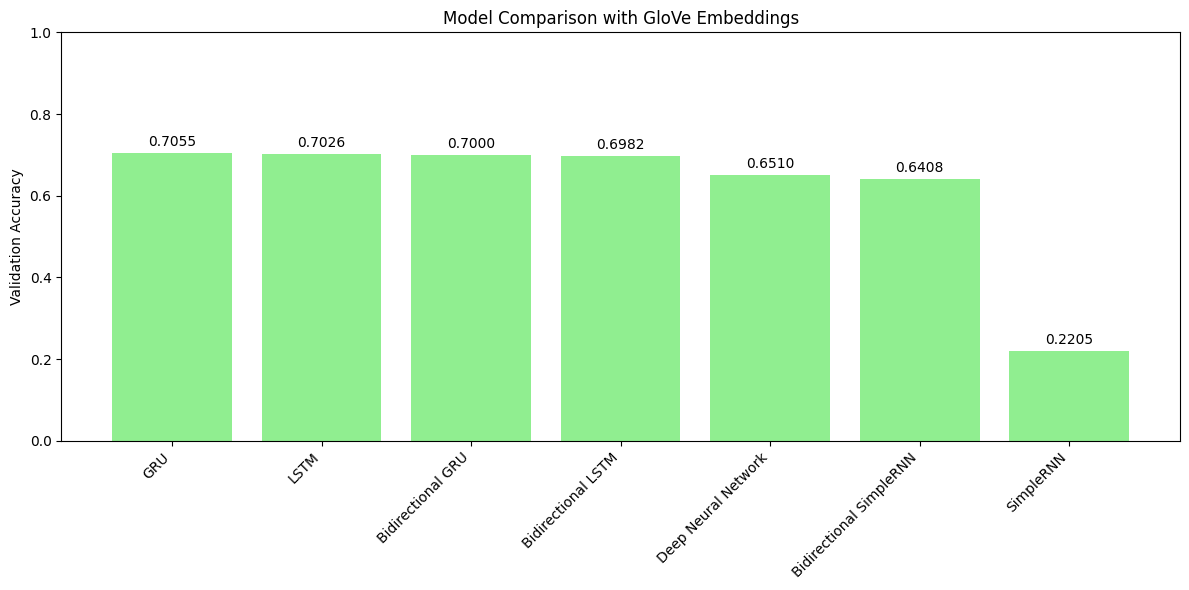


🏆 BEST OVERALL MODEL: GRU
   Validation Accuracy: 0.7055
   F1-weighted: 0.6998
   F1-macro: 0.6995

BEST MODEL: GRU
Validation Accuracy: 0.7055
F1-weighted: 0.6998
F1-macro: 0.6995


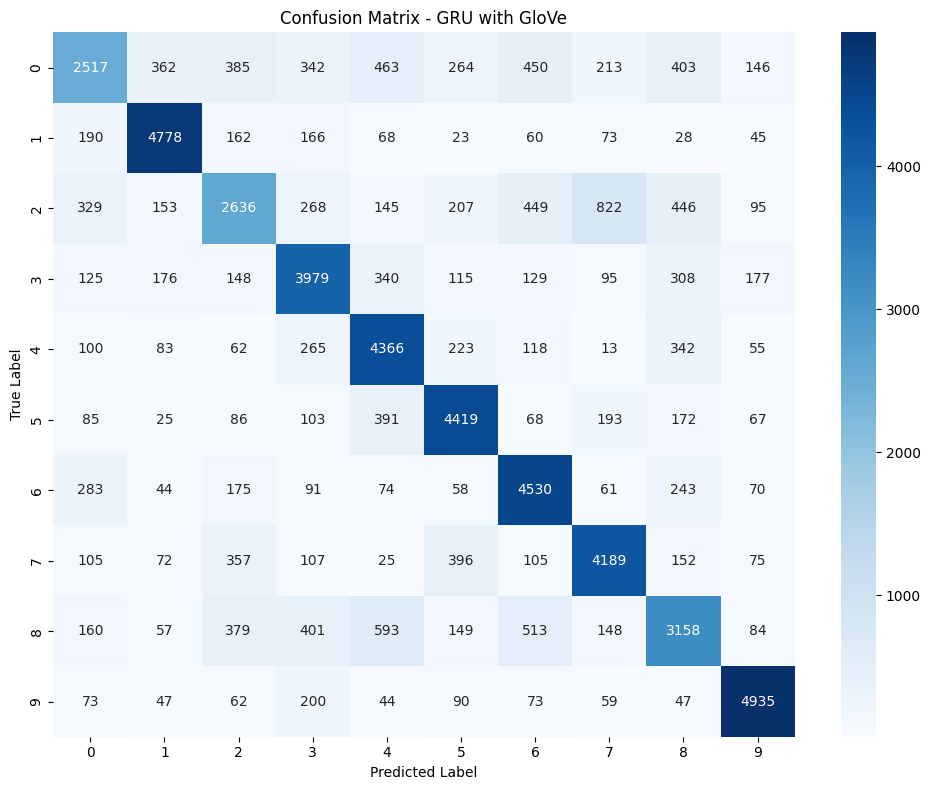


Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, GRU, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import gensim.downloader as api

# Ensure eager execution is enabled
# tf.config.run_functions_eagerly(True)

# Record start time
start_time = time.time()

# Initialize results storage
all_results = {}

# Load your data here (replace with your actual data loading code)
# For example:
# train = pd.read_csv('train.csv')
# val = pd.read_csv('val.csv')
# test = pd.read_csv('test.csv')

# Split the test data into X_test and y_test
X_test = test['cleaned_text_lemmatized']
y_test = test['Class_Encoded']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_len = 100  # Adjust based on your data analysis
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# GloVe configuration
rep_name = "GloVe"
rep_config = {
    "type": "pretrained",
    "dim": 100
}

print(f"\n{'='*70}")
print(f"EXPERIMENTS WITH {rep_name.upper()}")
print(f"{'='*70}")

# Create embedding matrix with proper dtype
embedding_matrix = np.zeros((vocab_size, rep_config["dim"]), dtype=np.float32)

print(f"\nLoading pre-trained {rep_name} embeddings...")
try:
    # Load pre-trained GloVe embeddings
    glove_vectors = api.load("glove-wiki-gigaword-100")

    for word, i in tokenizer.word_index.items():
        if word in glove_vectors:
            # Explicitly convert to numpy array and ensure float32
            embedding_matrix[i] = glove_vectors[word].astype(np.float32)
        else:
            # Initialize with random values for unknown words
            embedding_matrix[i] = np.random.normal(scale=0.6, size=(rep_config["dim"],)).astype(np.float32)

    print(f"Loaded {rep_name} embeddings with dimension {rep_config['dim']}")
except Exception as e:
    print(f"Failed to load pre-trained embeddings: {e}. Using random initialization.")
    for i in range(1, vocab_size):
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(rep_config["dim"],)).astype(np.float32)

# Define neural network models
nn_models = {
    "Deep Neural Network": {
        "layers": [
            {"type": "flatten"},
            {"type": "dense", "units": 256, "activation": "relu"},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": 128, "activation": "relu"},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 15
    },
    "SimpleRNN": {
        "layers": [
            {"type": "rnn", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 20
    },
    "GRU": {
        "layers": [
            {"type": "gru", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 15
    },
    "LSTM": {
        "layers": [
            {"type": "lstm", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 20
    },
    "Bidirectional SimpleRNN": {
        "layers": [
            {"type": "bidirectional", "layer_type": "rnn", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 128,
        "epochs": 15
    },
    "Bidirectional GRU": {
        "layers": [
            {"type": "bidirectional", "layer_type": "gru", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 20
    },
    "Bidirectional LSTM": {
        "layers": [
            {"type": "bidirectional", "layer_type": "lstm", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 15
    }
}

# Store results for this representation
rep_results = {}

# Iterate through each neural network model
for model_name, model_config in nn_models.items():
    print(f"\n🧠 {model_name} with {rep_name}")
    print("-" * 60)

    model_start_time = time.time()

    # Build the model
    model = Sequential()

    # Add embedding layer
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=rep_config["dim"],
        weights=[embedding_matrix],
        trainable=False  # Freeze embeddings for faster training
    ))

    # Add model-specific layers
    for layer_config in model_config["layers"]:
        if layer_config["type"] == "flatten":
            model.add(Flatten())
        elif layer_config["type"] == "dense":
            model.add(Dense(
                units=layer_config["units"],
                activation=layer_config["activation"]
            ))
        elif layer_config["type"] == "dropout":
            model.add(Dropout(layer_config["rate"]))
        elif layer_config["type"] == "rnn":
            model.add(SimpleRNN(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "gru":
            model.add(GRU(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "lstm":
            model.add(LSTM(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "bidirectional":
            if layer_config["layer_type"] == "rnn":
                rnn_layer = SimpleRNN(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )
            elif layer_config["layer_type"] == "gru":
                rnn_layer = GRU(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )
            elif layer_config["layer_type"] == "lstm":
                rnn_layer = LSTM(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )

            model.add(Bidirectional(rnn_layer))

    # Compile the model
    model.compile(
        optimizer=model_config["optimizer"],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)
    ]

    # Train the model
    history = model.fit(
        X_train_pad, y_train_encoded,
        batch_size=model_config["batch_size"],
        epochs=model_config["epochs"],
        validation_data=(X_val_pad, y_val_encoded),
        callbacks=callbacks,
        verbose=1
    )

    # Predict on validation set
    y_val_pred_proba = model.predict(X_val_pad)
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_encoded, y_val_pred)
    f1_weighted = f1_score(y_val_encoded, y_val_pred, average='weighted')
    f1_macro = f1_score(y_val_encoded, y_val_pred, average='macro')
    training_time = time.time() - model_start_time

    print(f"  Validation Accuracy: {accuracy:.4f}")
    print(f"  F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")
    print(f"  Training time: {training_time:.2f} seconds")

    # Store results for this model
    rep_results[model_name] = {
        'accuracy': accuracy,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro,
        'params': model_config,
        'model': model,
        'predictions': y_val_pred,
        'history': history.history,
        'training_time': training_time
    }

    # Save the model
    model.save(f'{rep_name.lower().replace("-", "_")}_{model_name.lower().replace(" ", "_")}_model.h5')

# Store all results for this representation
all_results[rep_name] = rep_results

# Generate comprehensive comparison
print(f"\n{'='*80}")
print("COMPREHENSIVE COMPARISON OF ALL MODELS WITH GLOVE")
print("EVALUATED ON VALIDATION SET")
print(f"{'='*80}")

# Create a comparison table
comparison_data = []
for model_name, model_info in rep_results.items():
    comparison_data.append({
        'Model': model_name,
        'Validation Accuracy': model_info['accuracy'],
        'F1-weighted': model_info['f1_weighted'],
        'F1-macro': model_info['f1_macro'],
        'Training Time (s)': model_info['training_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(['Validation Accuracy'], ascending=False)

# Display the results
print("\nDetailed Results Table (Validation Set Performance):")
print(comparison_df.to_string(index=False))

# Visual comparison - Accuracy
plt.figure(figsize=(12, 6))
models = comparison_df['Model']
accuracies = comparison_df['Validation Accuracy']
bars = plt.bar(models, accuracies, color='lightgreen')
plt.title('Model Comparison with GloVe Embeddings')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('glove_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify the best overall model
best_overall_idx = comparison_df['Validation Accuracy'].idxmax()
best_overall = comparison_df.loc[best_overall_idx]

print(f"\n🏆 BEST OVERALL MODEL: {best_overall['Model']}")
print(f"   Validation Accuracy: {best_overall['Validation Accuracy']:.4f}")
print(f"   F1-weighted: {best_overall['F1-weighted']:.4f}")
print(f"   F1-macro: {best_overall['F1-macro']:.4f}")

# Generate confusion matrix for the best model
best_model_name = best_overall['Model']
best_model_info = rep_results[best_model_name]

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"Validation Accuracy: {best_model_info['accuracy']:.4f}")
print(f"F1-weighted: {best_model_info['f1_weighted']:.4f}")
print(f"F1-macro: {best_model_info['f1_macro']:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_val_encoded, best_model_info['predictions'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} with GloVe')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f'confusion_matrix_glove_{best_model_name.lower().replace(" ", "_")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_))

# Plot training history
history = best_model_info['history']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history['accuracy'], label='Training Accuracy')
ax1.plot(history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history['loss'], label='Training Loss')
ax2.plot(history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.savefig(f'training_history_glove_{best_model_name.lower().replace(" ", "_")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Calculate total execution time
total_time = time.time() - start_time
print(f"\n⏰ Total execution time: {total_time/60:.2f} minutes")

# Save all results for later reference
with open('glove_results.pkl', 'wb') as f:
    pickle.dump(all_results, f)

print("\n✅ All experiments completed successfully!")
print("📁 Files saved:")
print("   - All model files (.h5)")
print("   - glove_results.pkl (all results)")
print("   - Multiple visualization plots (.png)")

# Final evaluation on test set with the best model
print(f"\n{'='*80}")
print("FINAL EVALUATION ON TEST SET WITH BEST MODEL")
print(f"{'='*80}")

print(f"\n🔍 Evaluating best model ({best_model_name}) on test set...")

# Predict on test set
y_test_pred_proba = best_model_info['model'].predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_test_pred)
f1_weighted = f1_score(y_test_encoded, y_test_pred, average='weighted')
f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro')

print(f"  Test Accuracy: {accuracy:.4f}")
print(f"  F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_.astype(str)))  # Convert to string

In [ ]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_.astype(str)))  # Convert to string


Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.45      0.53      5545
           1       0.82      0.85      0.84      5593
           2       0.59      0.47      0.53      5550
           3       0.67      0.71      0.69      5592
           4       0.67      0.78      0.72      5627
           5       0.74      0.79      0.76      5609
           6       0.70      0.80      0.75      5629
           7       0.71      0.75      0.73      5583
           8       0.60      0.56      0.58      5642
           9       0.86      0.88      0.87      5630

    accuracy                           0.71     56000
   macro avg       0.70      0.70      0.70     56000
weighted avg       0.70      0.71      0.70     56000



# **SKIP-GRAM EXPERIMENTS WITH NEURAL NETWORK MODELS**


EXPERIMENTS WITH SKIP-GRAM

Training Skip-gram embeddings...
Trained Skip-gram embeddings with dimension 100

🧠 Deep Neural Network with Skip-gram
------------------------------------------------------------
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 65ms/step - accuracy: 0.4816 - loss: 1.5506 - val_accuracy: 0.6790 - val_loss: 1.0174 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.6589 - loss: 1.0917 - val_accuracy: 0.6842 - val_loss: 0.9928 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.6806 - loss: 1.0207 - val_accuracy: 0.6838 - val_loss: 0.9881 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 14s 63ms/step - accuracy: 0.6954 - loss: 0.9662 - val_accuracy: 0.6853 - val_loss: 0.9843 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7083 - loss: 0.9189 - val_accuracy: 0.6849 - val_loss: 0.9880 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7185 - loss: 0.8822 - val_accuracy: 0.6851 - val_loss: 0.9906 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 13s 61ms/step - accuracy: 0.7416 - loss: 0.8116

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 96s 437ms/step - accuracy: 0.1640 - loss: 2.2076 - val_accuracy: 0.2518 - val_loss: 1.9458 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 94s 429ms/step - accuracy: 0.1861 - loss: 2.1477 - val_accuracy: 0.1816 - val_loss: 2.1065 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 94s 431ms/step - accuracy: 0.1732 - loss: 2.1854 - val_accuracy: 0.2726 - val_loss: 1.9159 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 94s 428ms/step - accuracy: 0.2966 - loss: 1.8918 - val_accuracy: 0.4292 - val_loss: 1.6477 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 93s 425ms/step - accuracy: 0.3175 - loss: 1.9212 - val_accuracy: 0.2529 - val_loss: 1.9752 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 95s 434ms/step - accuracy: 0.2422 - loss: 1.9909 - val_accuracy: 0.3105 - val_loss: 1.8628 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 94s 431ms/step - accuracy: 0.3146 - loss:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
I0000 00:00:1757149033.338816     600 cuda_dnn.cc:529] Loaded cuDNN version 90300


219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.2423 - loss: 2.0303 - val_accuracy: 0.6388 - val_loss: 1.1498 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6516 - loss: 1.1217 - val_accuracy: 0.6809 - val_loss: 0.9948 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6826 - loss: 1.0147 - val_accuracy: 0.6918 - val_loss: 0.9631 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6924 - loss: 0.9795 - val_accuracy: 0.6990 - val_loss: 0.9391 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.6981 - loss: 0.9623 - val_accuracy: 0.7032 - val_loss: 0.9274 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7031 - loss: 0.9423 - val_accuracy: 0.7055 - val_loss: 0.9178 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 20s 93ms/step - accuracy: 0.7059 - loss: 0.9314

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 96ms/step - accuracy: 0.3230 - loss: 1.8976 - val_accuracy: 0.5250 - val_loss: 1.4931 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.5951 - loss: 1.3494 - val_accuracy: 0.6371 - val_loss: 1.1668 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6429 - loss: 1.1714 - val_accuracy: 0.6677 - val_loss: 1.0760 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6651 - loss: 1.1002 - val_accuracy: 0.6684 - val_loss: 1.0550 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 94ms/step - accuracy: 0.6729 - loss: 1.0646 - val_accuracy: 0.6802 - val_loss: 1.0256 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6794 - loss: 1.0396 - val_accuracy: 0.6851 - val_loss: 1.0071 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 21s 95ms/step - accuracy: 0.6864 - loss: 1.0144

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 204s 933ms/step - accuracy: 0.3792 - loss: 1.7944 - val_accuracy: 0.6396 - val_loss: 1.1259 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 204s 933ms/step - accuracy: 0.6260 - loss: 1.1968 - val_accuracy: 0.6620 - val_loss: 1.0697 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 203s 927ms/step - accuracy: 0.6461 - loss: 1.1413 - val_accuracy: 0.6650 - val_loss: 1.0616 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 204s 932ms/step - accuracy: 0.6561 - loss: 1.1148 - val_accuracy: 0.6628 - val_loss: 1.0525 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 202s 922ms/step - accuracy: 0.6580 - loss: 1.1049 - val_accuracy: 0.6739 - val_loss: 1.0289 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 203s 927ms/step - accuracy: 0.6621 - loss: 1.0924 - val_accuracy: 0.6769 - val_loss: 1.0258 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 206s 941ms/step - accuracy: 0.6658 

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 28s 126ms/step - accuracy: 0.4220 - loss: 1.7260 - val_accuracy: 0.6788 - val_loss: 1.0000 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.6716 - loss: 1.0432 - val_accuracy: 0.6941 - val_loss: 0.9573 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.6853 - loss: 0.9962 - val_accuracy: 0.6986 - val_loss: 0.9353 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.6950 - loss: 0.9713 - val_accuracy: 0.7020 - val_loss: 0.9228 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.6985 - loss: 0.9560 - val_accuracy: 0.7043 - val_loss: 0.9138 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.6996 - loss: 0.9516 - val_accuracy: 0.7063 - val_loss: 0.9125 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.7029 - loss:

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 124ms/step - accuracy: 0.4782 - loss: 1.5962 - val_accuracy: 0.6775 - val_loss: 1.0093 - learning_rate: 0.0010
Epoch 2/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6716 - loss: 1.0519 - val_accuracy: 0.6896 - val_loss: 0.9694 - learning_rate: 0.0010
Epoch 3/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6821 - loss: 1.0127 - val_accuracy: 0.6926 - val_loss: 0.9553 - learning_rate: 0.0010
Epoch 4/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6884 - loss: 0.9896 - val_accuracy: 0.6978 - val_loss: 0.9390 - learning_rate: 0.0010
Epoch 5/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6917 - loss: 0.9741 - val_accuracy: 0.6989 - val_loss: 0.9356 - learning_rate: 0.0010
Epoch 6/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 122ms/step - accuracy: 0.6946 - loss: 0.9657 - val_accuracy: 0.7027 - val_loss: 0.9263 - learning_rate: 0.0010
Epoch 7/15
219/219 ━━━━━━━━━━━━━━━━━━━━ 27s 121ms/step - accuracy: 0.7001 - loss:

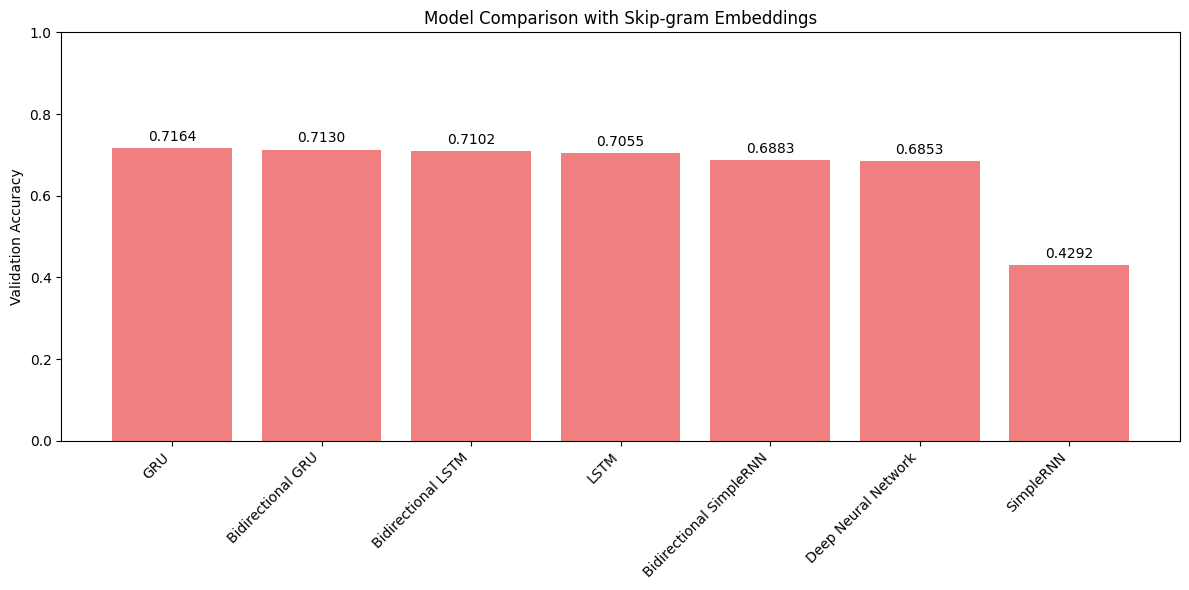


🏆 BEST OVERALL MODEL: GRU
   Validation Accuracy: 0.7164
   F1-weighted: 0.7112
   F1-macro: 0.7109

BEST MODEL: GRU
Validation Accuracy: 0.7164
F1-weighted: 0.7112
F1-macro: 0.7109


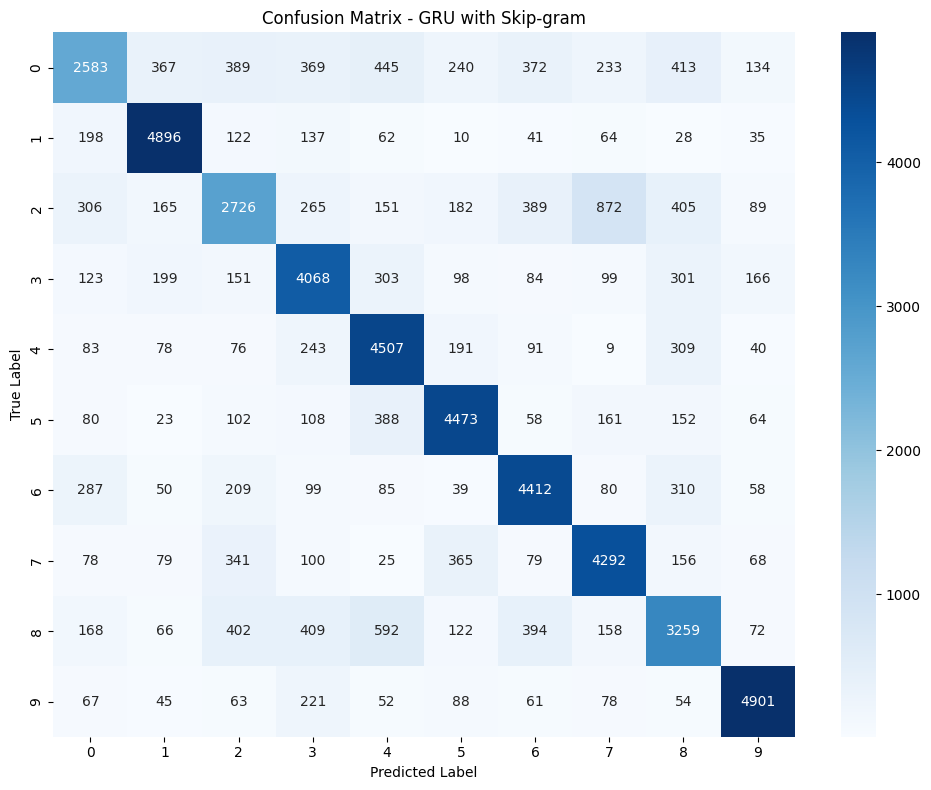


Classification Report:


TypeError: object of type 'numpy.int64' has no len()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import joblib
import pickle
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, SimpleRNN, GRU, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from gensim.models import Word2Vec
import gensim.downloader as api

# Ensure eager execution is enabled
# tf.config.run_functions_eagerly(True)

# Record start time
start_time = time.time()

# Initialize results storage
all_results = {}

# Load your data here (replace with your actual data loading code)
# For example:
# train = pd.read_csv('train.csv')
# val = pd.read_csv('val.csv')
# test = pd.read_csv('test.csv')

# Split the test data into X_test and y_test
X_test = test['cleaned_text_lemmatized']
y_test = test['Class_Encoded']

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(np.unique(y_train_encoded))

# Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_size = len(tokenizer.word_index) + 1

# Convert texts to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad sequences to a fixed length
max_len = 100  # Adjust based on your data analysis
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Skip-gram configuration
rep_name = "Skip-gram"
rep_config = {
    "type": "trained",
    "dim": 100,
    "window": 5,
    "min_count": 2
}

print(f"\n{'='*70}")
print(f"EXPERIMENTS WITH {rep_name.upper()}")
print(f"{'='*70}")

# Create embedding matrix with proper dtype
embedding_matrix = np.zeros((vocab_size, rep_config["dim"]), dtype=np.float32)

print(f"\nTraining {rep_name} embeddings...")
# Tokenize sentences for Word2Vec
sentences = [text.split() for text in X_train]

# Train Word2Vec model with Skip-gram
w2v_model = Word2Vec(
    sentences=sentences,
    vector_size=rep_config["dim"],
    window=rep_config["window"],
    min_count=rep_config["min_count"],
    sg=1,  # Skip-gram
    workers=4
)

# Create embedding matrix
for word, i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        # Explicitly convert to numpy array and ensure float32
        embedding_matrix[i] = w2v_model.wv[word].astype(np.float32)
    else:
        # Initialize with random values for unknown words
        embedding_matrix[i] = np.random.normal(scale=0.6, size=(rep_config["dim"],)).astype(np.float32)

print(f"Trained {rep_name} embeddings with dimension {rep_config['dim']}")

# Define neural network models
nn_models = {
    "Deep Neural Network": {
        "layers": [
            {"type": "flatten"},
            {"type": "dense", "units": 256, "activation": "relu"},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": 128, "activation": "relu"},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 15
    },
    "SimpleRNN": {
        "layers": [
            {"type": "rnn", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 20
    },
    "GRU": {
        "layers": [
            {"type": "gru", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 15
    },
    "LSTM": {
        "layers": [
            {"type": "lstm", "units": 128, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 20
    },
    "Bidirectional SimpleRNN": {
        "layers": [
            {"type": "bidirectional", "layer_type": "rnn", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 128,
        "epochs": 15
    },
    "Bidirectional GRU": {
        "layers": [
            {"type": "bidirectional", "layer_type": "gru", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 256,
        "epochs": 20
    },
    "Bidirectional LSTM": {
        "layers": [
            {"type": "bidirectional", "layer_type": "lstm", "units": 64, "return_sequences": False},
            {"type": "dropout", "rate": 0.5},
            {"type": "dense", "units": num_classes, "activation": "softmax"}
        ],
        "optimizer": Adam(learning_rate=0.001),
        "batch_size": 512,
        "epochs": 15
    }
}

# Store results for this representation
rep_results = {}

# Iterate through each neural network model
for model_name, model_config in nn_models.items():
    print(f"\n🧠 {model_name} with {rep_name}")
    print("-" * 60)

    model_start_time = time.time()

    # Build the model
    model = Sequential()

    # Add embedding layer
    model.add(Embedding(
        input_dim=vocab_size,
        output_dim=rep_config["dim"],
        weights=[embedding_matrix],
        trainable=False  # Freeze embeddings for faster training
    ))

    # Add model-specific layers
    for layer_config in model_config["layers"]:
        if layer_config["type"] == "flatten":
            model.add(Flatten())
        elif layer_config["type"] == "dense":
            model.add(Dense(
                units=layer_config["units"],
                activation=layer_config["activation"]
            ))
        elif layer_config["type"] == "dropout":
            model.add(Dropout(layer_config["rate"]))
        elif layer_config["type"] == "rnn":
            model.add(SimpleRNN(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "gru":
            model.add(GRU(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "lstm":
            model.add(LSTM(
                units=layer_config["units"],
                return_sequences=layer_config.get("return_sequences", False)
            ))
        elif layer_config["type"] == "bidirectional":
            if layer_config["layer_type"] == "rnn":
                rnn_layer = SimpleRNN(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )
            elif layer_config["layer_type"] == "gru":
                rnn_layer = GRU(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )
            elif layer_config["layer_type"] == "lstm":
                rnn_layer = LSTM(
                    units=layer_config["units"],
                    return_sequences=layer_config.get("return_sequences", False)
                )

            model.add(Bidirectional(rnn_layer))

    # Compile the model
    model.compile(
        optimizer=model_config["optimizer"],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    # Callbacks
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-7)
    ]

    # Train the model
    history = model.fit(
        X_train_pad, y_train_encoded,
        batch_size=model_config["batch_size"],
        epochs=model_config["epochs"],
        validation_data=(X_val_pad, y_val_encoded),
        callbacks=callbacks,
        verbose=1
    )

    # Predict on validation set
    y_val_pred_proba = model.predict(X_val_pad)
    y_val_pred = np.argmax(y_val_pred_proba, axis=1)

    # Calculate metrics
    accuracy = accuracy_score(y_val_encoded, y_val_pred)
    f1_weighted = f1_score(y_val_encoded, y_val_pred, average='weighted')
    f1_macro = f1_score(y_val_encoded, y_val_pred, average='macro')
    training_time = time.time() - model_start_time

    print(f"  Validation Accuracy: {accuracy:.4f}")
    print(f"  F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")
    print(f"  Training time: {training_time:.2f} seconds")

    # Store results for this model
    rep_results[model_name] = {
        'accuracy': accuracy,
        'f1_weighted': f1_weighted,
        'f1_macro': f1_macro,
        'params': model_config,
        'model': model,
        'predictions': y_val_pred,
        'history': history.history,
        'training_time': training_time
    }

    # Save the model
    model.save(f'{rep_name.lower().replace("-", "_")}_{model_name.lower().replace(" ", "_")}_model.h5')

# Store all results for this representation
all_results[rep_name] = rep_results

# Generate comprehensive comparison
print(f"\n{'='*80}")
print("COMPREHENSIVE COMPARISON OF ALL MODELS WITH SKIP-GRAM")
print("EVALUATED ON VALIDATION SET")
print(f"{'='*80}")

# Create a comparison table
comparison_data = []
for model_name, model_info in rep_results.items():
    comparison_data.append({
        'Model': model_name,
        'Validation Accuracy': model_info['accuracy'],
        'F1-weighted': model_info['f1_weighted'],
        'F1-macro': model_info['f1_macro'],
        'Training Time (s)': model_info['training_time']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values(['Validation Accuracy'], ascending=False)

# Display the results
print("\nDetailed Results Table (Validation Set Performance):")
print(comparison_df.to_string(index=False))

# Visual comparison - Accuracy
plt.figure(figsize=(12, 6))
models = comparison_df['Model']
accuracies = comparison_df['Validation Accuracy']
bars = plt.bar(models, accuracies, color='lightcoral')
plt.title('Model Comparison with Skip-gram Embeddings')
plt.ylabel('Validation Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('skipgram_models_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Identify the best overall model
best_overall_idx = comparison_df['Validation Accuracy'].idxmax()
best_overall = comparison_df.loc[best_overall_idx]

print(f"\n🏆 BEST OVERALL MODEL: {best_overall['Model']}")
print(f"   Validation Accuracy: {best_overall['Validation Accuracy']:.4f}")
print(f"   F1-weighted: {best_overall['F1-weighted']:.4f}")
print(f"   F1-macro: {best_overall['F1-macro']:.4f}")

# Generate confusion matrix for the best model
best_model_name = best_overall['Model']
best_model_info = rep_results[best_model_name]

print(f"\n{'='*60}")
print(f"BEST MODEL: {best_model_name}")
print(f"{'='*60}")
print(f"Validation Accuracy: {best_model_info['accuracy']:.4f}")
print(f"F1-weighted: {best_model_info['f1_weighted']:.4f}")
print(f"F1-macro: {best_model_info['f1_macro']:.4f}")

# Generate and plot confusion matrix
cm = confusion_matrix(y_val_encoded, best_model_info['predictions'])
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} with Skip-gram')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig(f'confusion_matrix_skipgram_{best_model_name.lower().replace(" ", "_")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_))

# Plot training history
history = best_model_info['history']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot accuracy
ax1.plot(history['accuracy'], label='Training Accuracy')
ax1.plot(history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history['loss'], label='Training Loss')
ax2.plot(history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.savefig(f'training_history_skipgram_{best_model_name.lower().replace(" ", "_")}.png',
            dpi=300, bbox_inches='tight')
plt.show()

# Calculate total execution time
total_time = time.time() - start_time
print(f"\n⏰ Total execution time: {total_time/60:.2f} minutes")

# Save all results for later reference
with open('skipgram_results.pkl', 'wb') as f:
    pickle.dump(all_results, f)

print("\n✅ All experiments completed successfully!")
print("📁 Files saved:")
print("   - All model files (.h5)")
print("   - skipgram_results.pkl (all results)")
print("   - Multiple visualization plots (.png)")

# Final evaluation on test set with the best model
print(f"\n{'='*80}")
print("FINAL EVALUATION ON TEST SET WITH BEST MODEL")
print(f"{'='*80}")

print(f"\n🔍 Evaluating best model ({best_model_name}) on test set...")

# Predict on test set
y_test_pred_proba = best_model_info['model'].predict(X_test_pad)
y_test_pred = np.argmax(y_test_pred_proba, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_test_encoded, y_test_pred)
f1_weighted = f1_score(y_test_encoded, y_test_pred, average='weighted')
f1_macro = f1_score(y_test_encoded, y_test_pred, average='macro')

print(f"  Test Accuracy: {accuracy:.4f}")
print(f"  F1-weighted: {f1_weighted:.4f}, F1-macro: {f1_macro:.4f}")

# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_.astype(str)))  # Convert to string

In [ ]:
# Generate classification report
print("\nClassification Report:")
print(classification_report(y_val_encoded, best_model_info['predictions'],
                           target_names=label_encoder.classes_.astype(str)))  # Convert to string


Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.47      0.54      5545
           1       0.82      0.88      0.85      5593
           2       0.60      0.49      0.54      5550
           3       0.68      0.73      0.70      5592
           4       0.68      0.80      0.74      5627
           5       0.77      0.80      0.78      5609
           6       0.74      0.78      0.76      5629
           7       0.71      0.77      0.74      5583
           8       0.60      0.58      0.59      5642
           9       0.87      0.87      0.87      5630

    accuracy                           0.72     56000
   macro avg       0.71      0.72      0.71     56000
weighted avg       0.71      0.72      0.71     56000

